# **IMPORTING LIBRARIES**

In [163]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as ss
import scipy
from scipy.stats import norm

# **LOADING DATA**

In [164]:
data = yf.download('^SPX','2023-12-31','2024-12-30')
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


Price        Date    Adj Close        Close         High          Low  \
Ticker                    ^SPX         ^SPX         ^SPX         ^SPX   
0      2024-01-02  4742.830078  4742.830078  4754.330078  4722.669922   
1      2024-01-03  4704.810059  4704.810059  4729.290039  4699.709961   
2      2024-01-04  4688.680176  4688.680176  4726.779785  4687.529785   
3      2024-01-05  4697.240234  4697.240234  4721.490234  4682.109863   
4      2024-01-08  4763.540039  4763.540039  4764.540039  4699.819824   
..            ...          ...          ...          ...          ...   
245    2024-12-20  5930.850098  5930.850098  5982.060059  5832.299805   
246    2024-12-23  5974.069824  5974.069824  5978.250000  5902.569824   
247    2024-12-24  6040.040039  6040.040039  6040.100098  5981.439941   
248    2024-12-26  6037.589844  6037.589844  6049.750000  6007.370117   
249    2024-12-27  5970.839844  5970.839844  6006.169922  5932.950195   

Price          Open      Volume  
Ticker         ^SPX        ^SPX  
0       4745.200195  3743050000  
1       4725.069824  3950760000  
2       4697.419922  3715480000  
3       4690.569824  3844370000  
4       4703.700195  3742320000  
..              ...         ...  
245     5842.000000  8223220000  
246     5940.250000  3593280000  
247     5984.629883  1757720000  
248     6024.970215  2904530000  
249     6006.169922  3159610000  

[250 rows x 7 columns]

In [165]:
ticker = "^SPX"

stock = yf.Ticker(ticker)

expiration_dates = stock.options
print("Available Expiration Dates:", expiration_dates)
# Lists
all_calls = []
all_puts = []

for exp_date in expiration_dates:
    print(f"Fetching options data for expiration: {exp_date}")
    options_chain = stock.option_chain(exp_date)
    calls = options_chain.calls
    calls["expirationDate"] = exp_date
    all_calls.append(calls)
    puts = options_chain.puts
    puts["expirationDate"] = exp_date
    all_puts.append(puts)

calls_data = pd.concat(all_calls, ignore_index=True)
puts_data = pd.concat(all_puts, ignore_index=True)

# Save to CSV for later analysis
calls_data.to_csv("all_calls_data.csv", index=False)
puts_data.to_csv("all_puts_data.csv", index=False)

print("Options data fetched successfully and saved to CSV.")

Available Expiration Dates: ('2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-31', '2025-02-03', '2025-02-05', '2025-02-07', '2025-02-21', '2025-02-28', '2025-03-21', '2025-03-31', '2025-04-17', '2025-04-30', '2025-05-16', '2025-05-30', '2025-06-20', '2025-06-30', '2025-07-18', '2025-08-15', '2025-09-19', '2025-09-30', '2025-10-17', '2025-11-21', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-12-18', '2027-12-17', '2028-12-15', '2029-12-21')
Fetching options data for expiration: 2024-12-30
Fetching options data for expiration: 2024-12-31
Fetching options data for expiration: 2025-01-02
Fetching options data for expiration: 2025-01-03
Fetching options data for expiration: 2025-01-06
Fetching options data for expiration: 20

contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0    SPXW241230C02800000 2024-11-28 14:25:11+00:00  2800.0    3216.90    0.0   
1    SPXW241230C04000000 2024-12-17 14:43:59+00:00  4000.0    2053.89    0.0   
2    SPXW241230C04800000 2024-12-27 15:02:22+00:00  4800.0    1180.46    0.0   
3    SPXW241230C05000000 2024-12-27 17:36:33+00:00  5000.0     939.27  967.2   
4    SPXW241230C05150000 2024-12-20 16:25:06+00:00  5150.0     804.10  817.2   
..                   ...                       ...     ...        ...    ...   
109  SPXW241230C06600000 2024-12-24 17:40:28+00:00  6600.0       0.07    0.0   
110  SPXW241230C06800000 2024-12-24 16:19:26+00:00  6800.0       0.05    0.0   
111  SPXW241230C07000000 2024-12-05 17:58:19+00:00  7000.0       0.20    0.0   
112  SPXW241230C07200000 2024-12-18 20:54:20+00:00  7200.0       0.05    0.0   
113  SPXW241230C07600000 2024-12-18 20:57:11+00:00  7600.0       0.05    0.0   

        ask      change  percentChange  volume  openInterest  \
0      0.00    0.000000       0.000000     7.0             7   
1      0.00    0.000000       0.000000     1.0            14   
2      0.00   46.409912       4.092404     1.0             3   
3    985.00 -138.719970     -12.868391     1.0             1   
4    835.00    0.000000       0.000000     1.0             1   
..      ...         ...            ...     ...           ...   
109    0.10    0.000000       0.000000     1.0            14   
110    0.10    0.000000       0.000000     4.0            32   
111    0.05    0.000000       0.000000     1.0             3   
112    0.05    0.000000       0.000000    25.0          4001   
113    0.05    0.000000       0.000000     NaN           106   

     impliedVolatility  inTheMoney contractSize currency expirationDate  
0             0.000010        True      REGULAR      USD     2024-12-30  
1             0.000010        True      REGULAR      USD     2024-12-30  
2             0.000010        True      REGULAR      USD     2024-12-30  
3             1.247074        True      REGULAR      USD     2024-12-30  
4             1.069157        True      REGULAR      USD     2024-12-30  
..                 ...         ...          ...      ...            ...  
109           0.459966       False      REGULAR      USD     2024-12-30  
110           0.550786       False      REGULAR      USD     2024-12-30  
111           0.628910       False      REGULAR      USD     2024-12-30  
112           0.730471       False      REGULAR      USD     2024-12-30  
113           0.925782       False      REGULAR      USD     2024-12-30  

[114 rows x 15 columns]

In [166]:
all_calls_data = pd.read_csv("all_calls_data.csv")
all_puts_data = pd.read_csv("all_puts_data.csv")
print(all_calls_data)
all_puts_data

           contractSymbol              lastTradeDate   strike  lastPrice  \
0     SPXW241230C02800000  2024-11-28 14:25:11+00:00   2800.0    3216.90   
1     SPXW241230C04000000  2024-12-17 14:43:59+00:00   4000.0    2053.89   
2     SPXW241230C04800000  2024-12-27 15:02:22+00:00   4800.0    1180.46   
3     SPXW241230C05000000  2024-12-27 17:36:33+00:00   5000.0     939.27   
4     SPXW241230C05150000  2024-12-20 16:25:06+00:00   5150.0     804.10   
...                   ...                        ...      ...        ...   
6530   SPX291221C09000000  2024-12-16 15:43:59+00:00   9000.0     326.00   
6531   SPX291221C09200000  2024-12-09 10:19:00+00:00   9200.0     270.00   
6532   SPX291221C09400000  2024-12-19 19:34:57+00:00   9400.0     197.65   
6533   SPX291221C09600000  2024-12-24 15:43:38+00:00   9600.0     192.50   
6534   SPX291221C10000000  2024-12-27 20:37:03+00:00  10000.0     128.50   

        bid    ask      change  percentChange  volume  openInterest  \
0       0.0    0

contractSymbol              lastTradeDate   strike  lastPrice  \
0     SPXW241230P02400000  2024-12-20 15:15:08+00:00   2400.0       0.05   
1     SPXW241230P02600000  2024-12-27 16:10:40+00:00   2600.0       0.05   
2     SPXW241230P02800000  2024-12-20 15:22:17+00:00   2800.0       0.10   
3     SPXW241230P03000000  2024-12-19 17:33:12+00:00   3000.0       0.30   
4     SPXW241230P03200000  2024-12-23 14:33:33+00:00   3200.0       0.05   
...                   ...                        ...      ...        ...   
7990   SPX291221P08600000  2024-06-24 13:44:18+00:00   8600.0    1864.80   
7991   SPX291221P08800000  2024-07-19 18:59:45+00:00   8800.0    2014.49   
7992   SPX291221P09000000  2024-07-30 18:59:51+00:00   9000.0    2244.71   
7993   SPX291221P09600000  2024-08-21 13:31:47+00:00   9600.0    2640.36   
7994   SPX291221P10000000  2024-12-02 19:07:17+00:00  10000.0    2338.00   

         bid      ask  change  percentChange  volume  openInterest  \
0        0.0     0.05    0.00            0.0     5.0           118   
1        0.0     0.05   -0.05          -50.0    10.0             1   
2        0.0     0.05    0.00            0.0    98.0           161   
3        0.0     0.05    0.00            0.0    23.0            25   
4        0.0     0.05    0.00            0.0     2.0            28   
...      ...      ...     ...            ...     ...           ...   
7990  1888.5  1968.50    0.00            0.0     1.0            90   
7991  1882.2  2263.70    0.00            0.0     1.0             1   
7992     0.0     0.00    0.00            0.0     3.0             0   
7993     0.0     0.00    0.00            0.0     NaN             1   
7994     0.0     0.00    0.00            0.0     1.0            17   

      impliedVolatility  inTheMoney contractSize currency expirationDate  
0              3.343752       False      REGULAR      USD     2024-12-30  
1              3.046877       False      REGULAR      USD     2024-12-30  
2              2.796878       False      REGULAR      USD     2024-12-30  
3              2.546879       False      REGULAR      USD     2024-12-30  
4              2.312504       False      REGULAR      USD     2024-12-30  
...                 ...         ...          ...      ...            ...  
7990           0.000010        True      REGULAR      USD     2029-12-21  
7991           0.000010        True      REGULAR      USD     2029-12-21  
7992           0.000010        True      REGULAR      USD     2029-12-21  
7993           0.000010        True      REGULAR      USD     2029-12-21  
7994           0.000010        True      REGULAR      USD     2029-12-21  

[7995 rows x 15 columns]

# **Annual volatitlity**

In [173]:
def annual_volume(data):
    log_return = np.log(data['Close']/data['Open'])
    log_return = log_return.dropna()
    daily_volatility = log_return.std()
    volatility = daily_volatility*np.sqrt(len(data))
    return volatility
volatility = annual_volume(data).iloc[0]
print(f"The Annual Volatility is {volatility}")

The Annual Volatility is 0.09697657348502846


# **Black Scholes**

In [209]:
from scipy.stats import norm


def black_scholes(S, K, T, r, sigma, option):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if(option == 'call'):
        premium = S*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
    else:
        premium = K*np.exp(-r*T)*scipy.stats.norm.cdf(-d2) - S*scipy.stats.norm.cdf(-d1)
    return premium

# Calculate Theoretical Prices
def calculate_theoretical_prices(all,i, option_type):
    theoretical_prices = []
    date1 = datetime.strptime(expiration_dates[i], '%Y-%m-%d')
    date2 = datetime.strptime('2024-12-29', '%Y-%m-%d')
    d = (date1 - date2).days
    T = d/365
    t = T/100

    for K in all[i]['strike']:
      theoretical_price = black_scholes(S = 5970, K = K, T = T, r=0.0523*t, sigma=volatility,option = option_type)
      theoretical_prices.append(theoretical_price)
    return theoretical_prices

# Add theoretical prices to data
for i in range(len(all_calls)):
  dates = datetime.strptime(expiration_dates[i], '%Y-%m-%d')
  dates2 = datetime.strptime('2025-06-30', '%Y-%m-%d')
  if(dates<=dates2):
    all_calls[i]['TheoreticalPrice'] = calculate_theoretical_prices(all_calls,i, "call")
    all_puts[i]['TheoreticalPrice'] = calculate_theoretical_prices(all_puts,i, "put")

# **Plotting Actual vs Theoritical**

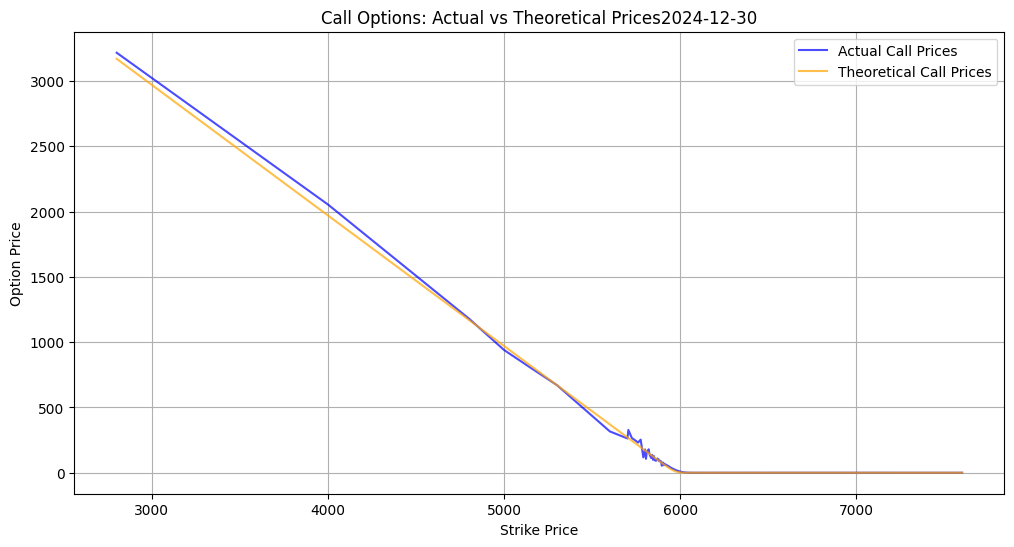

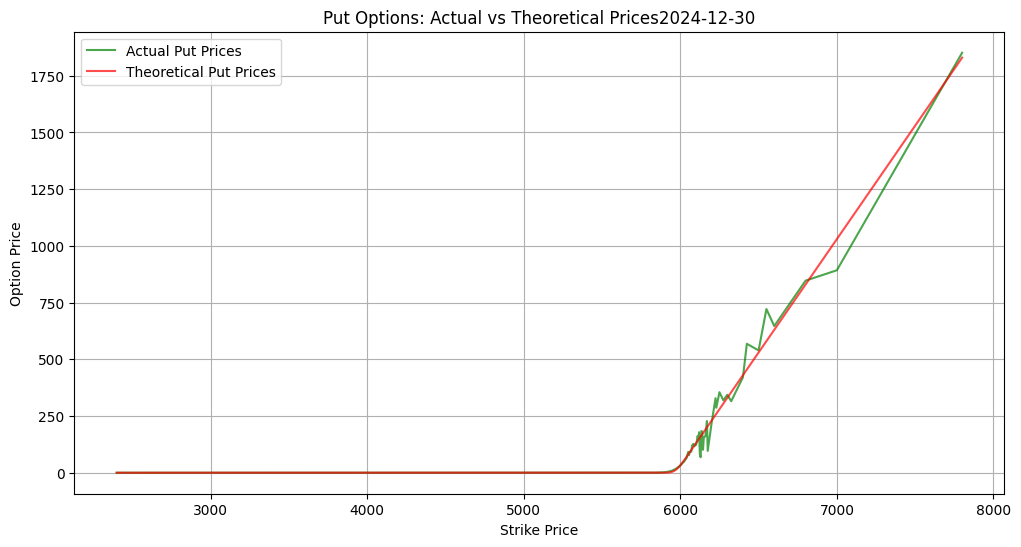

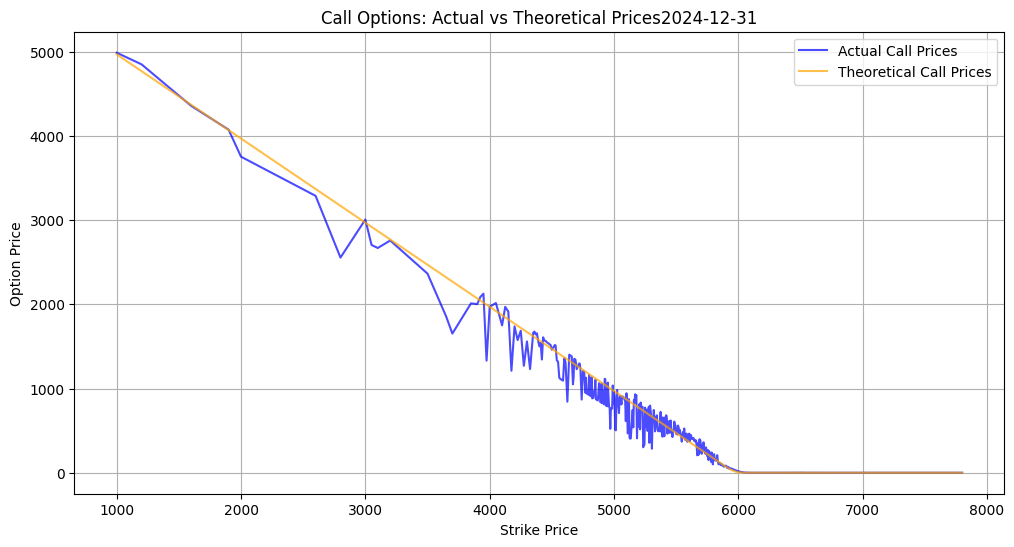

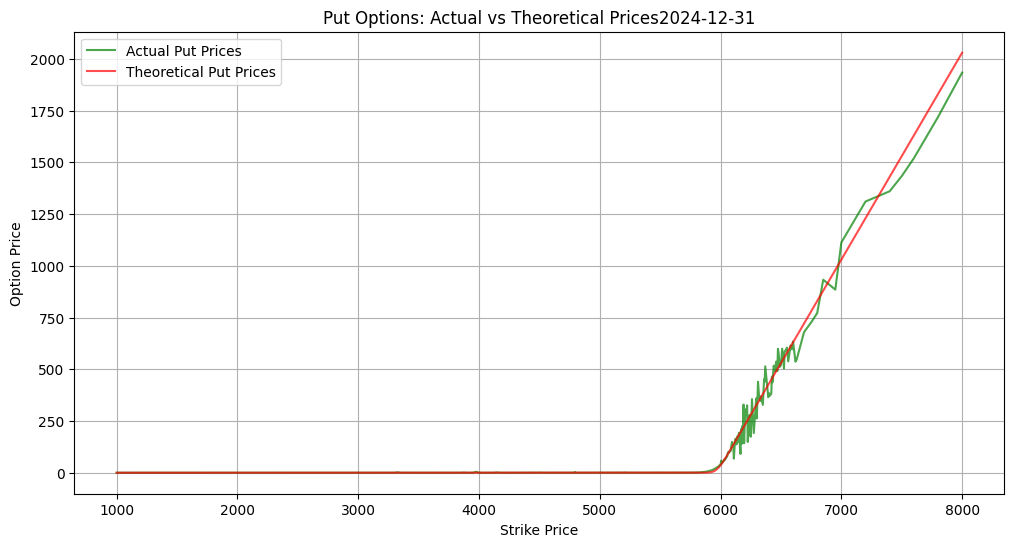

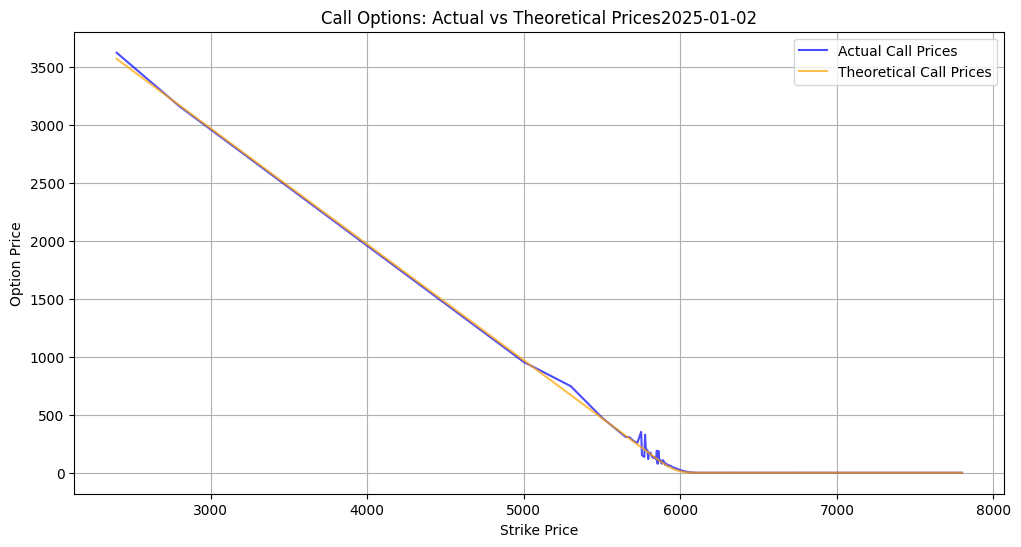

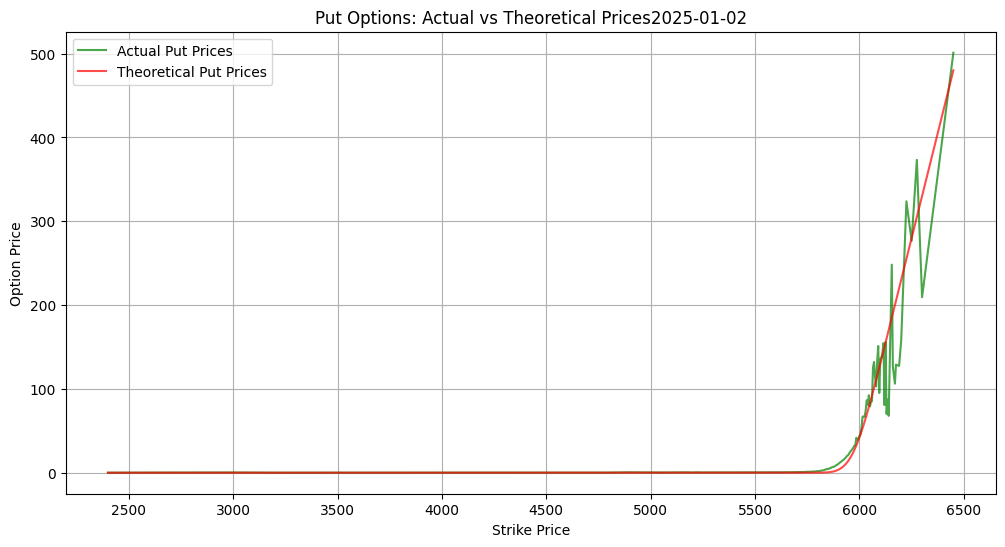

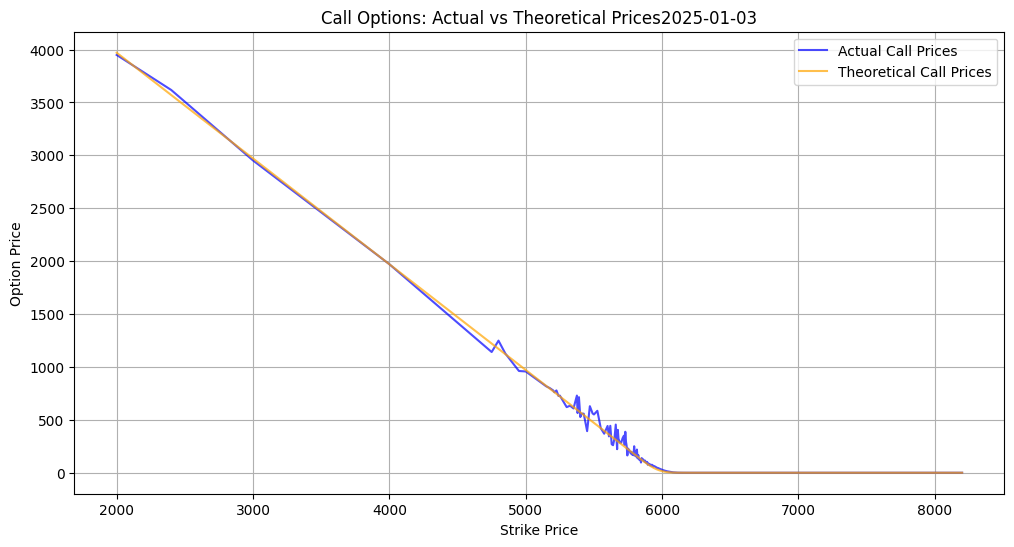

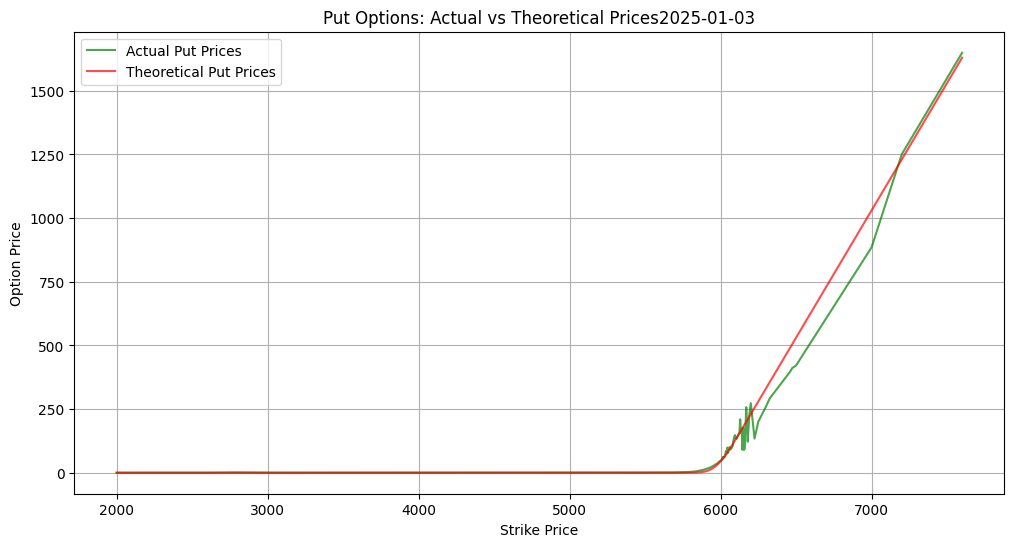

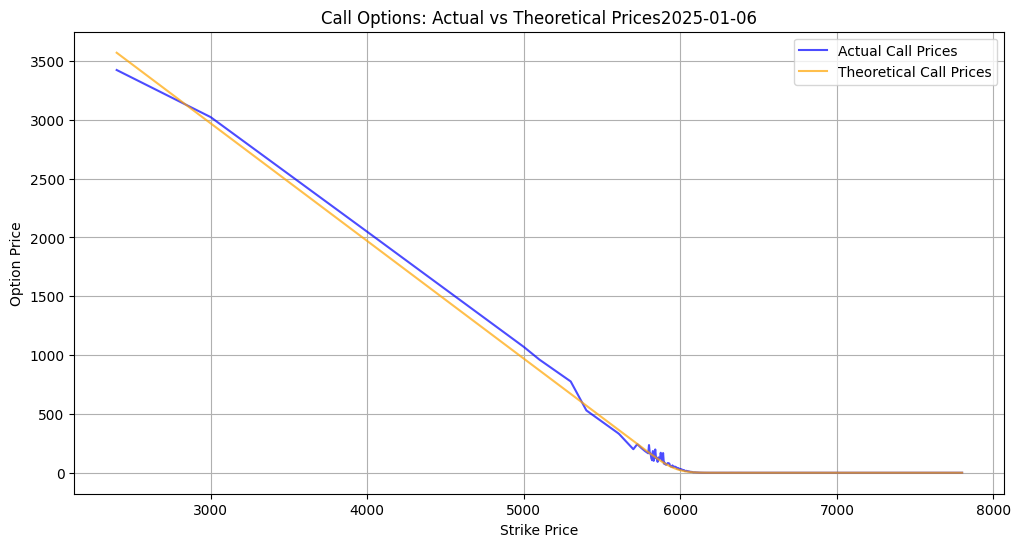

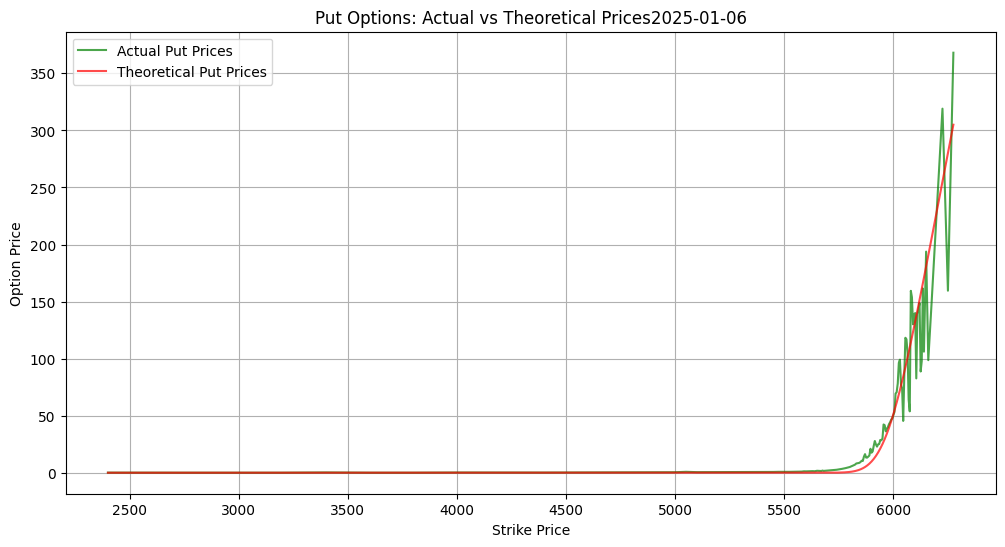

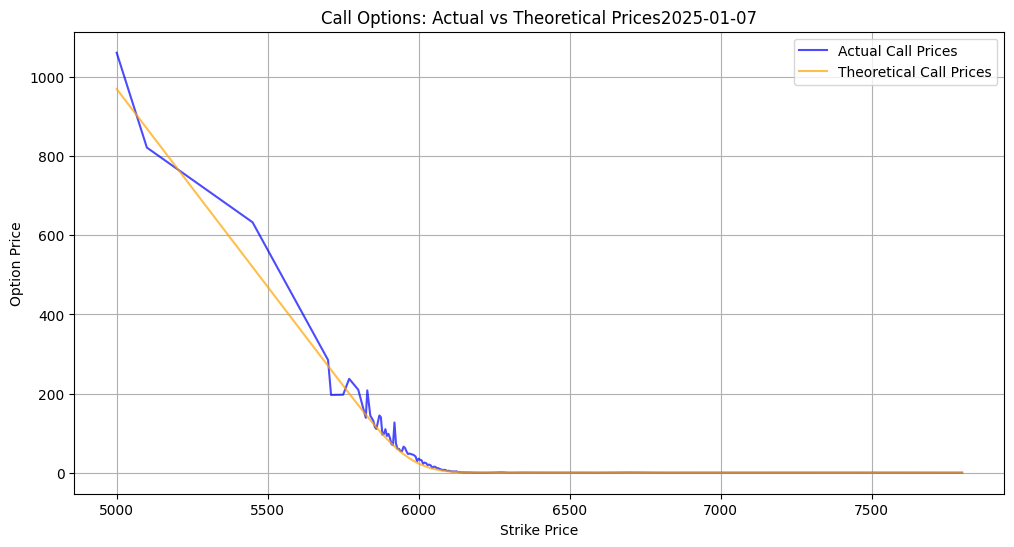

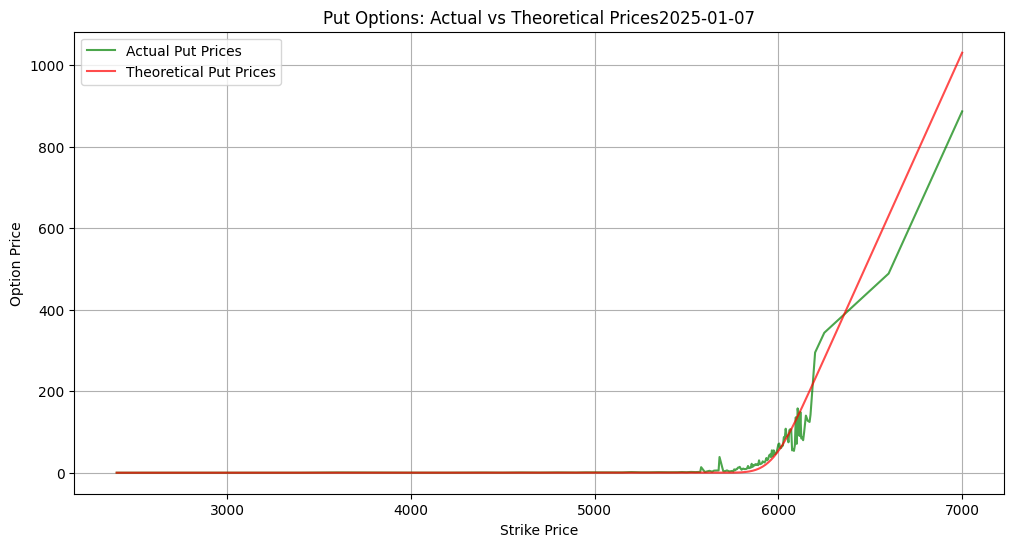

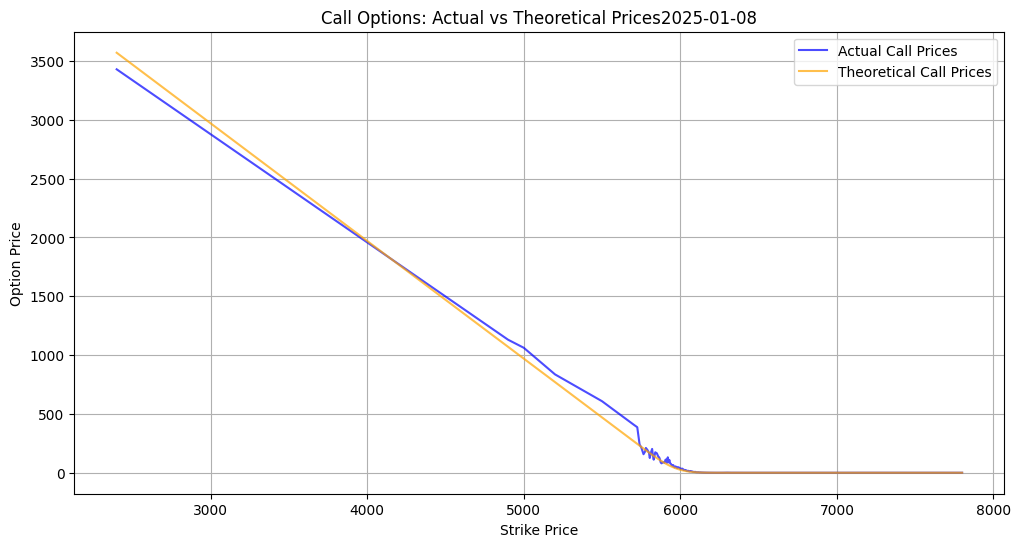

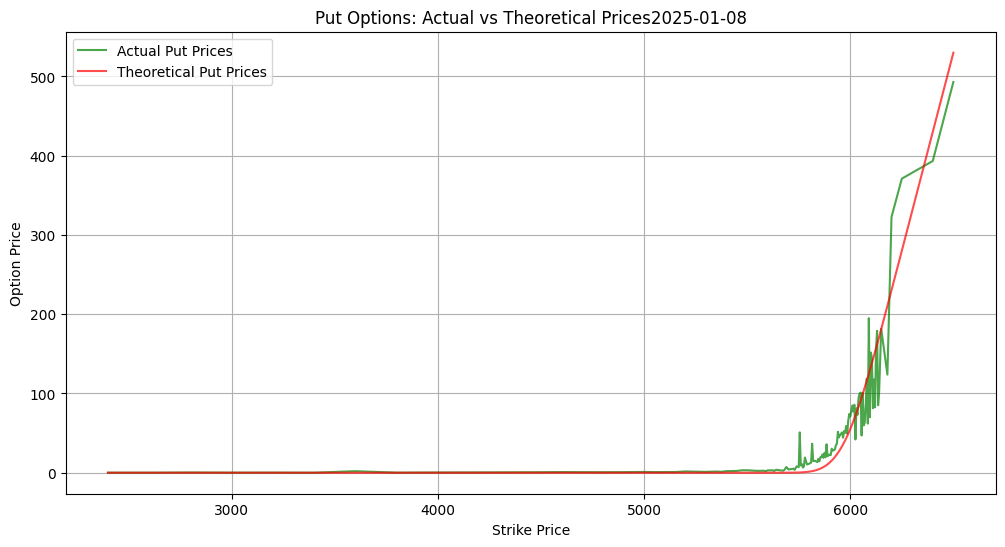

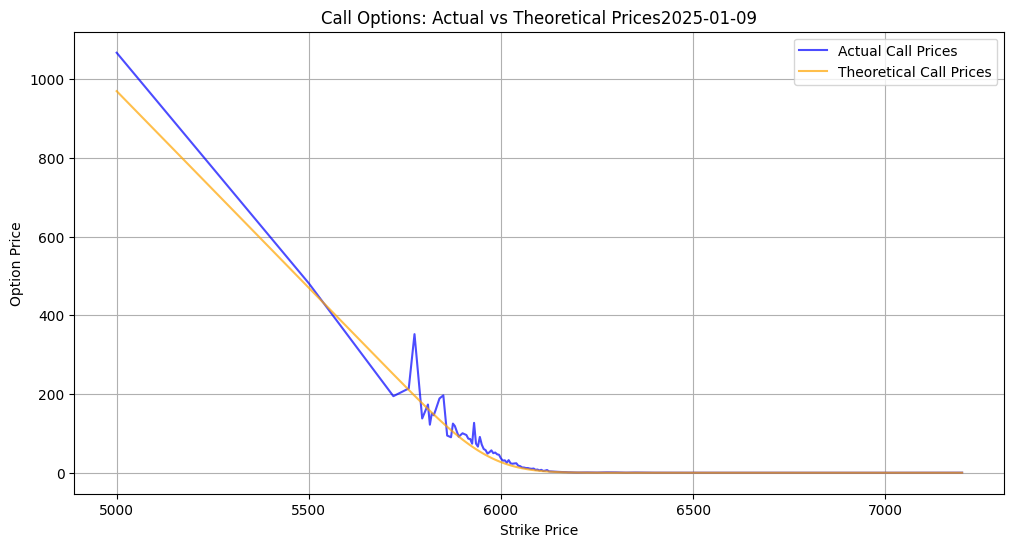

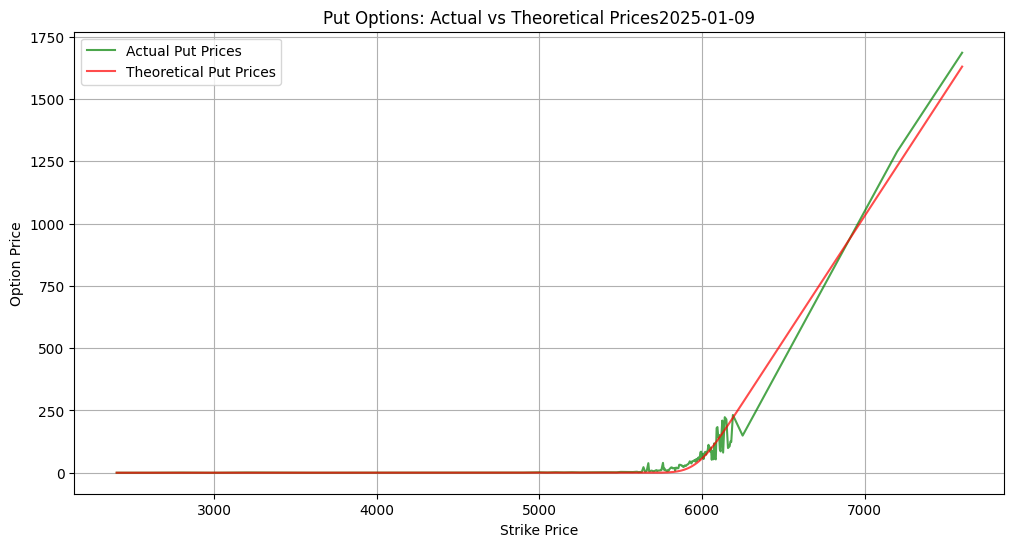

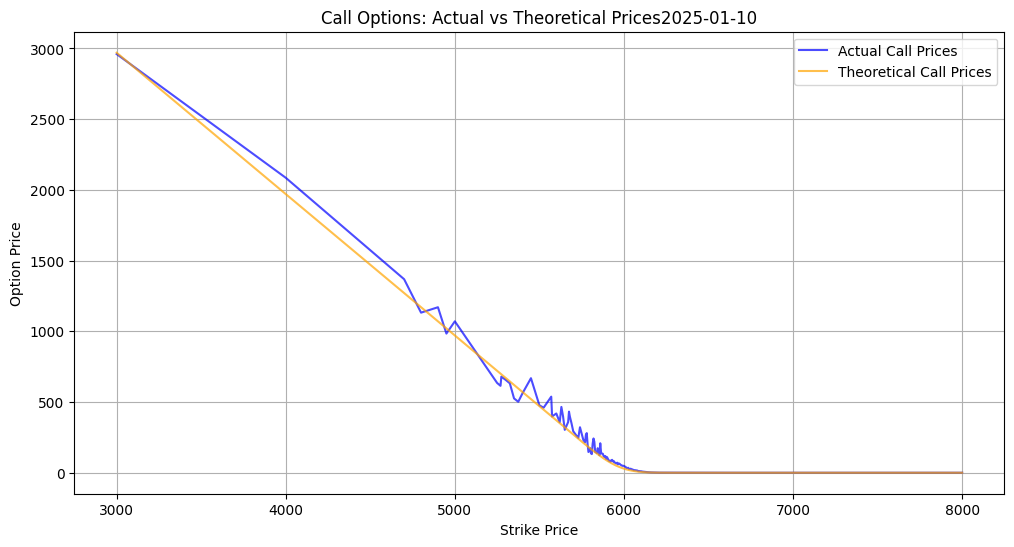

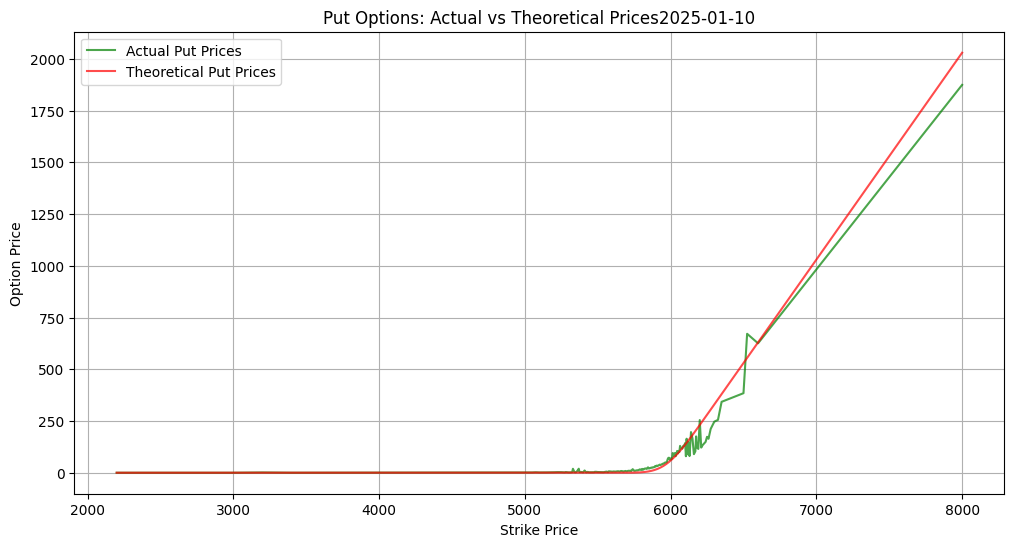

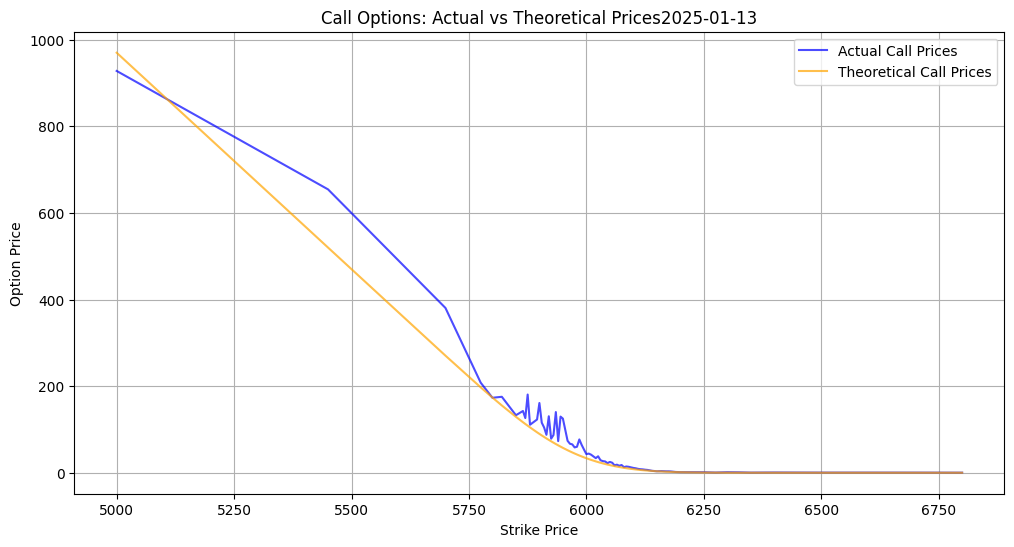

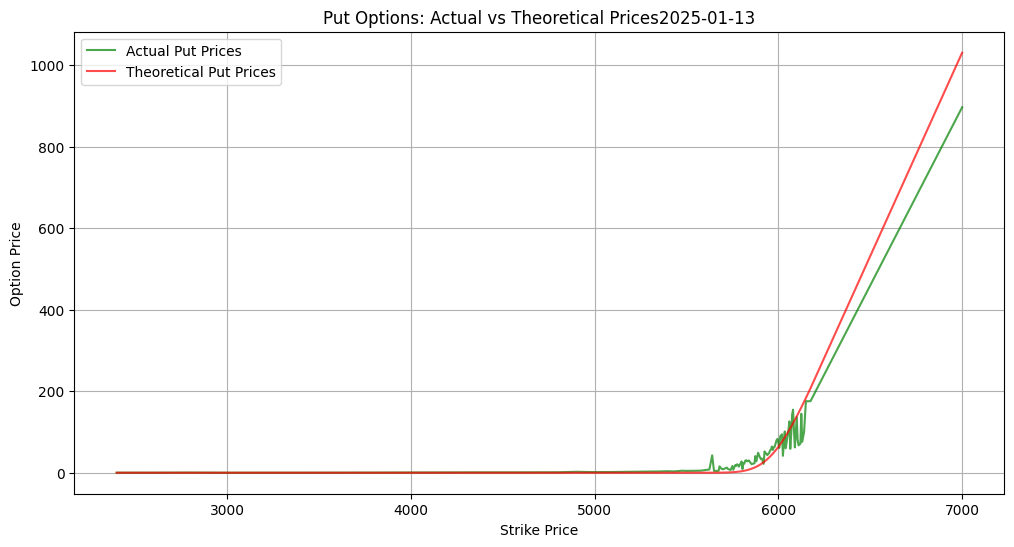

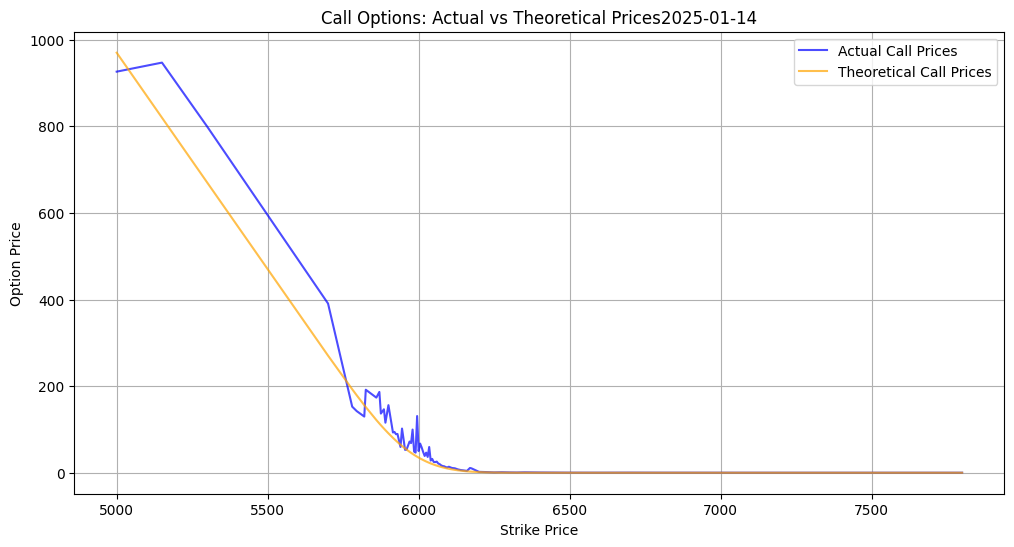

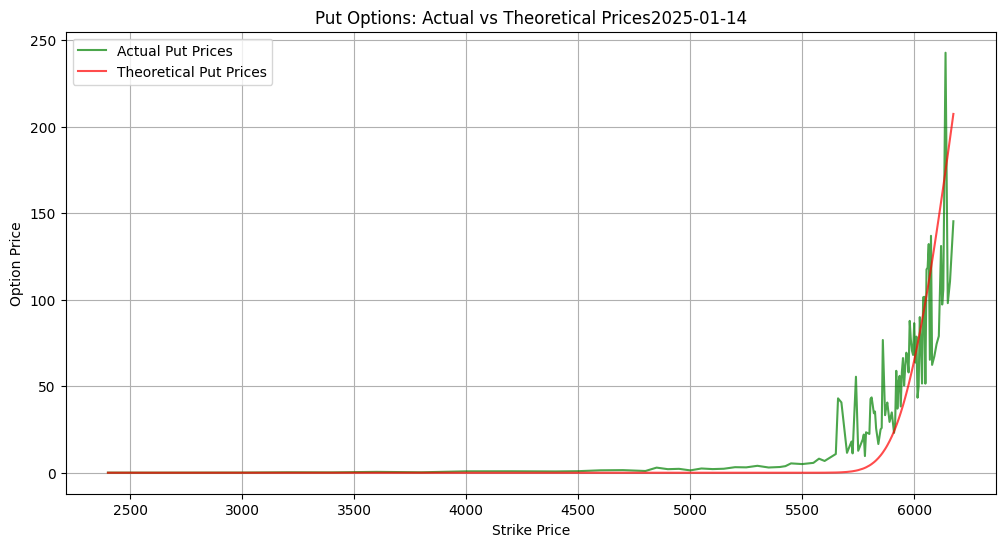

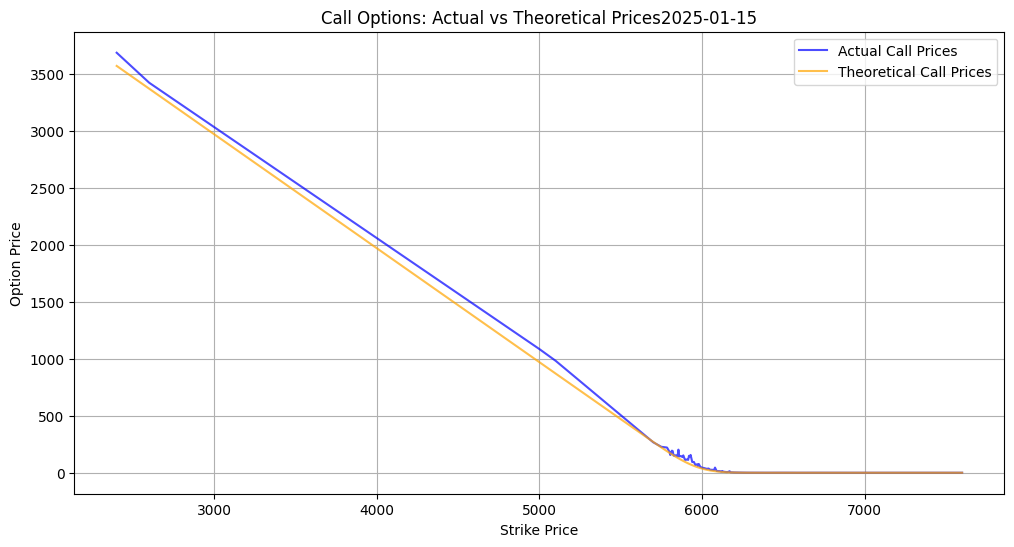

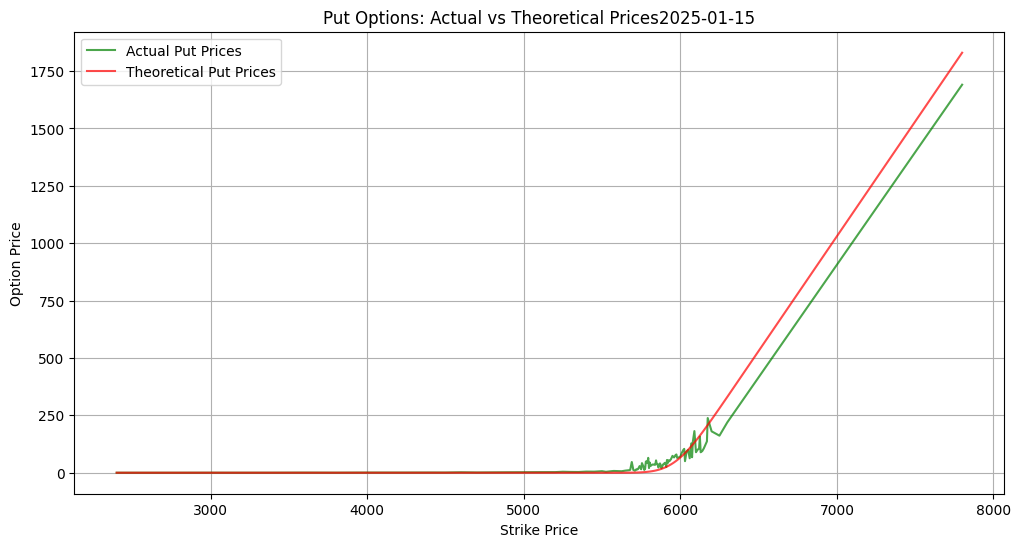

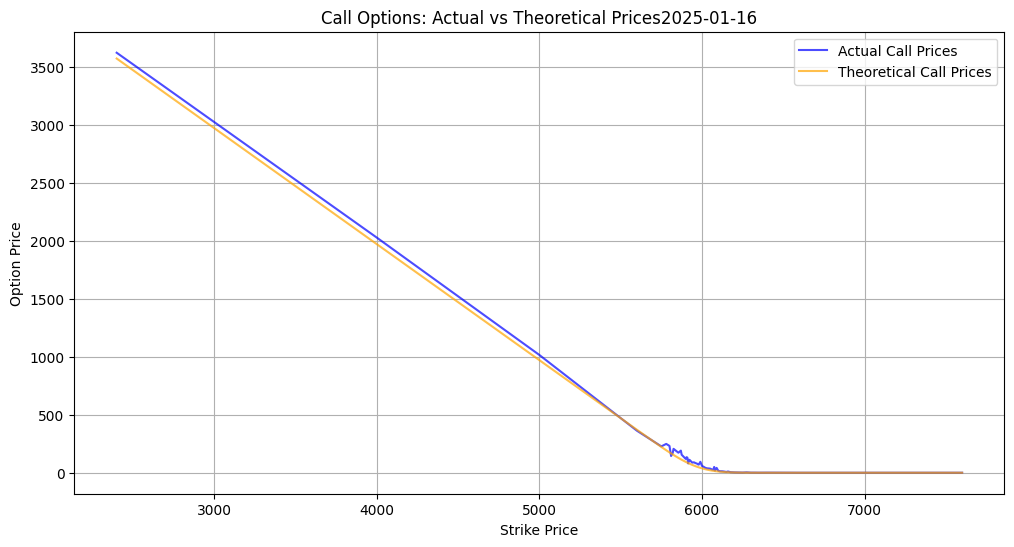

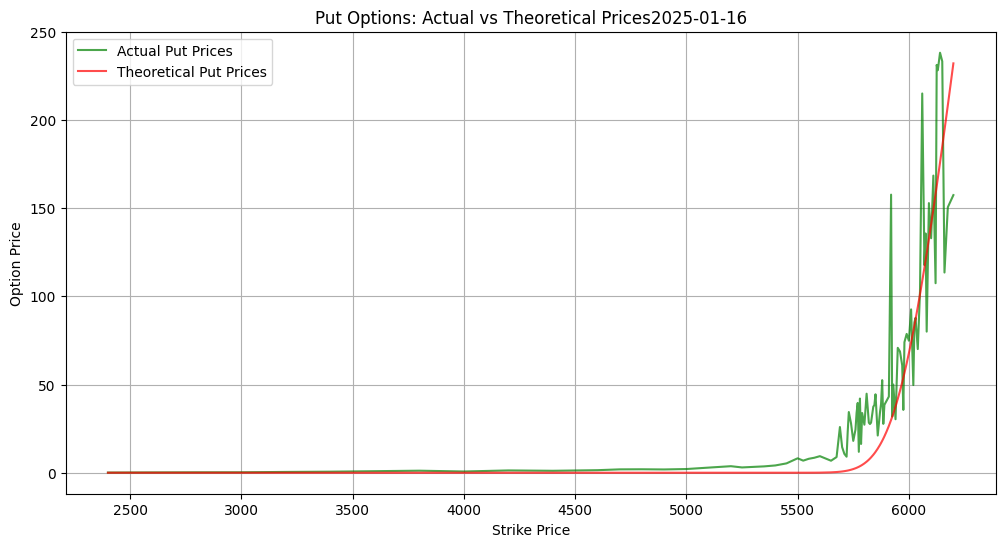

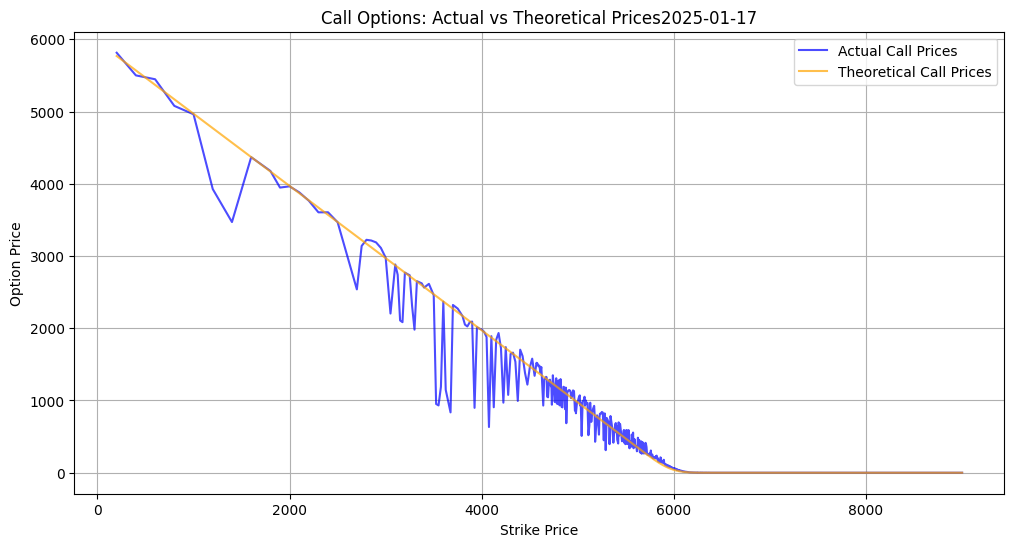

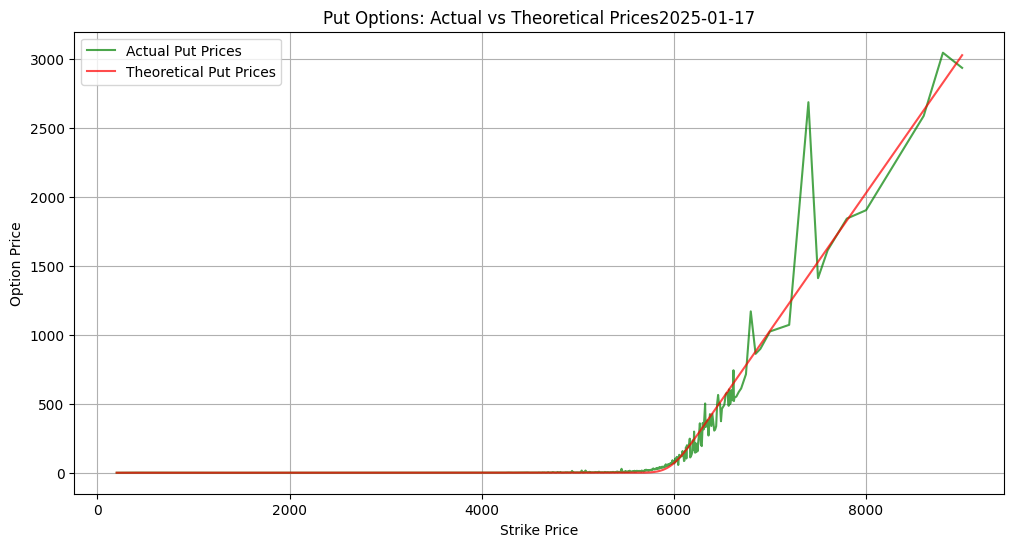

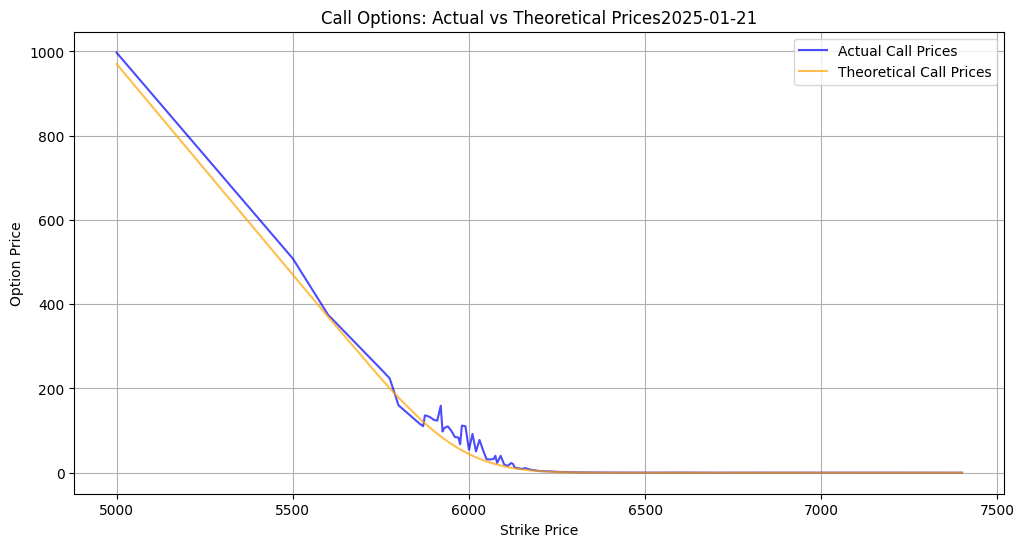

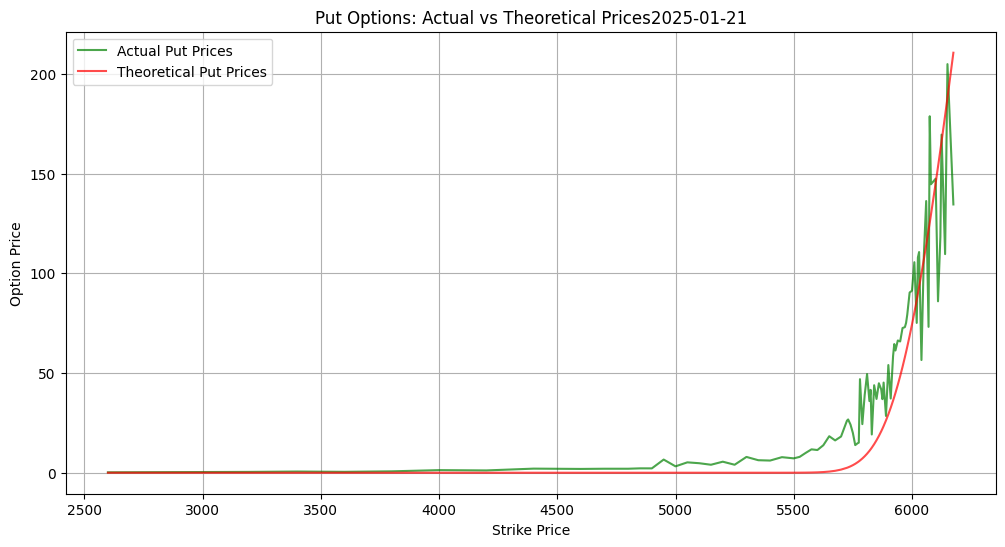

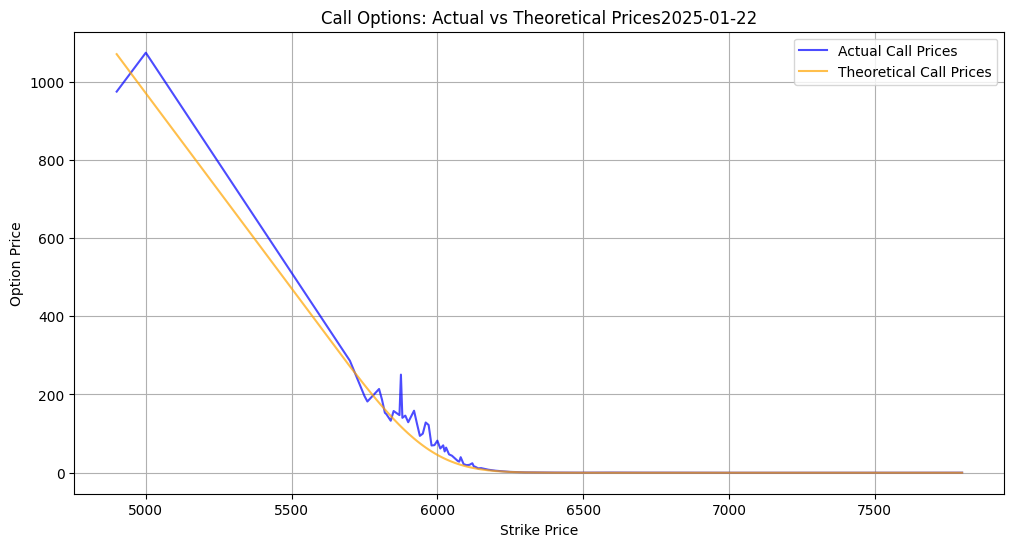

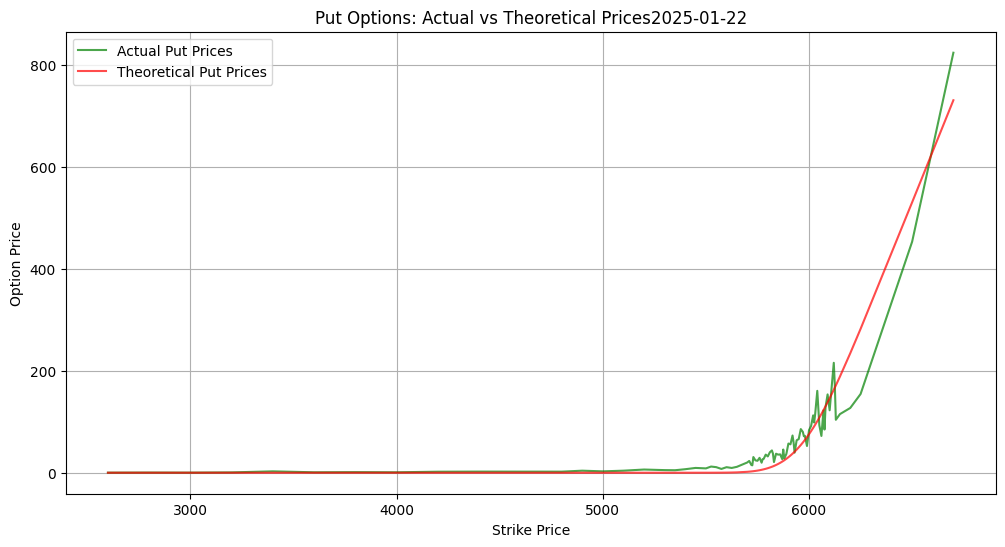

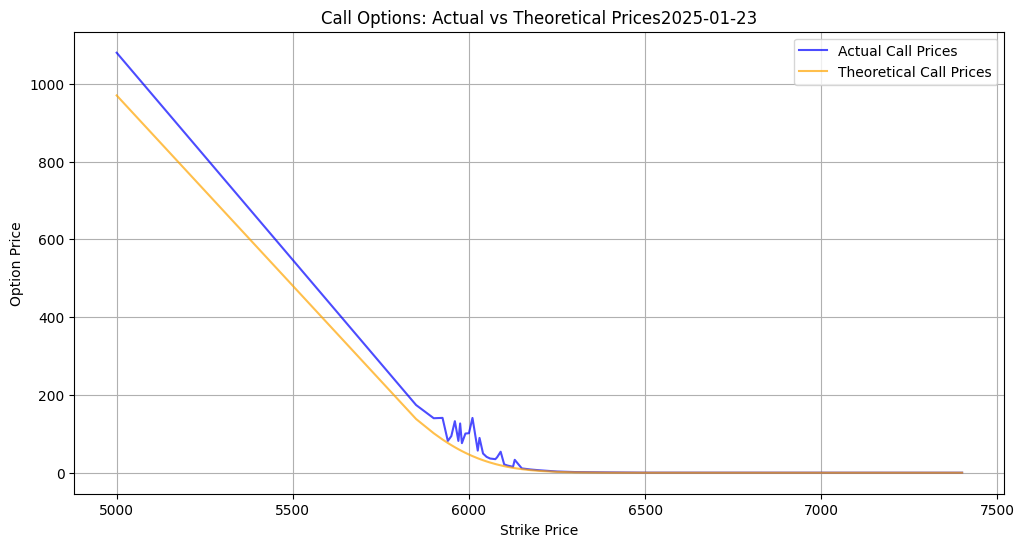

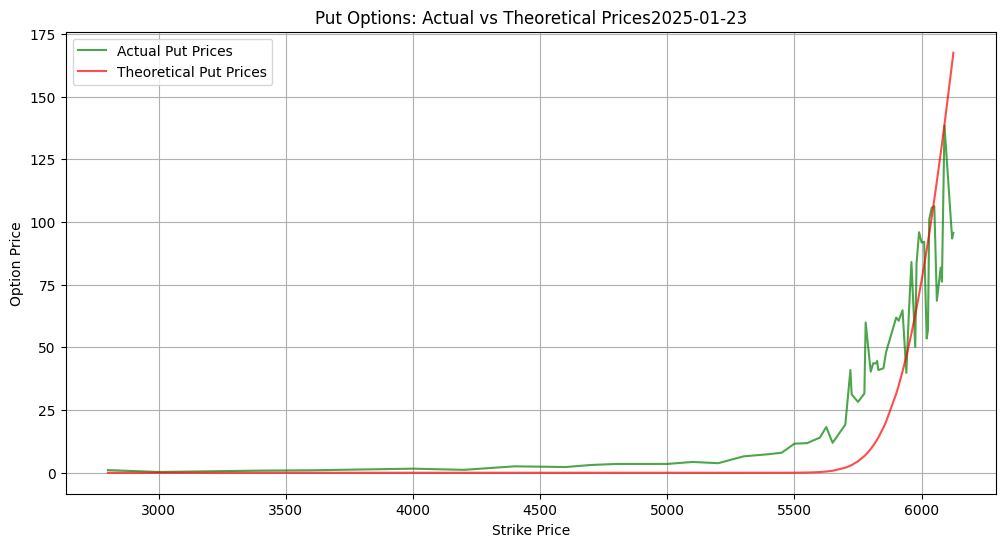

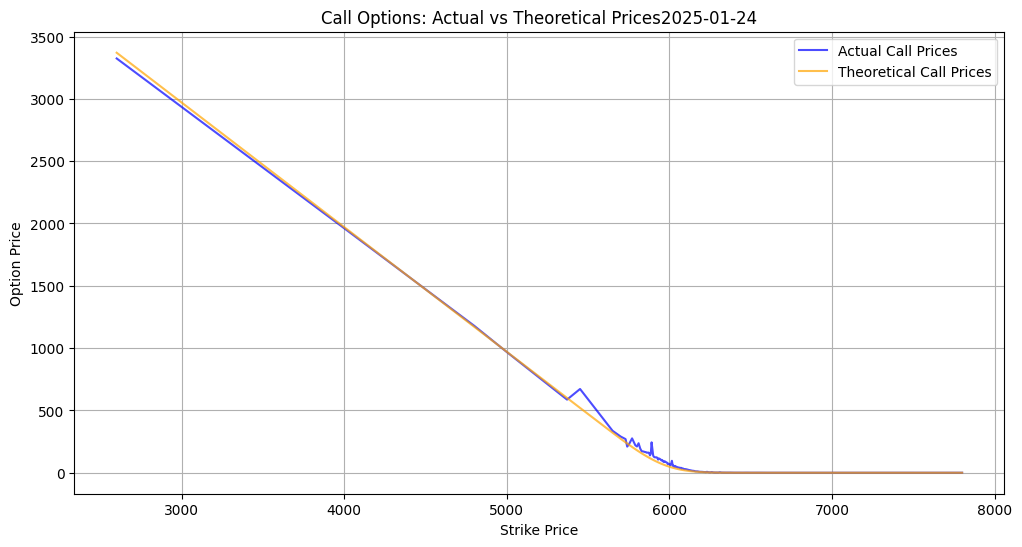

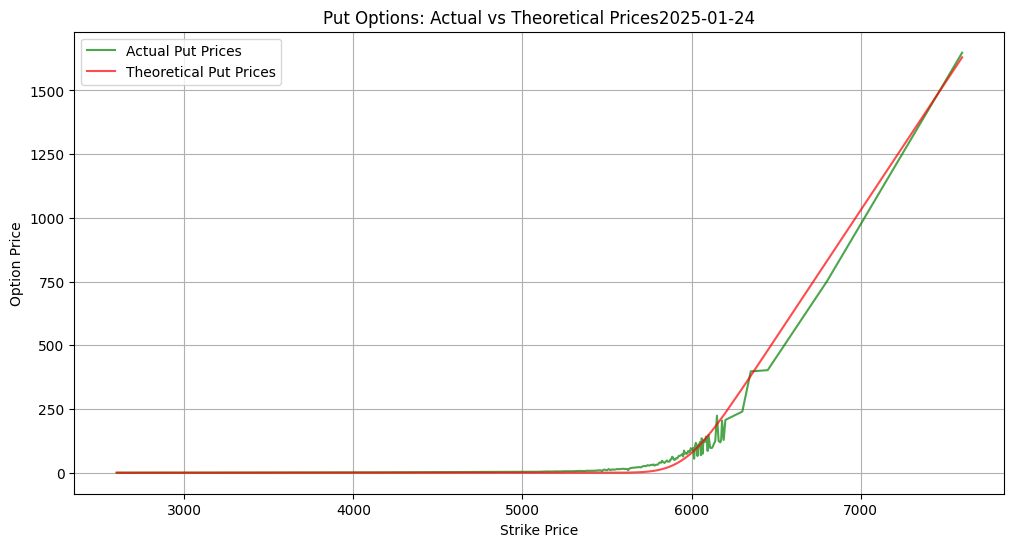

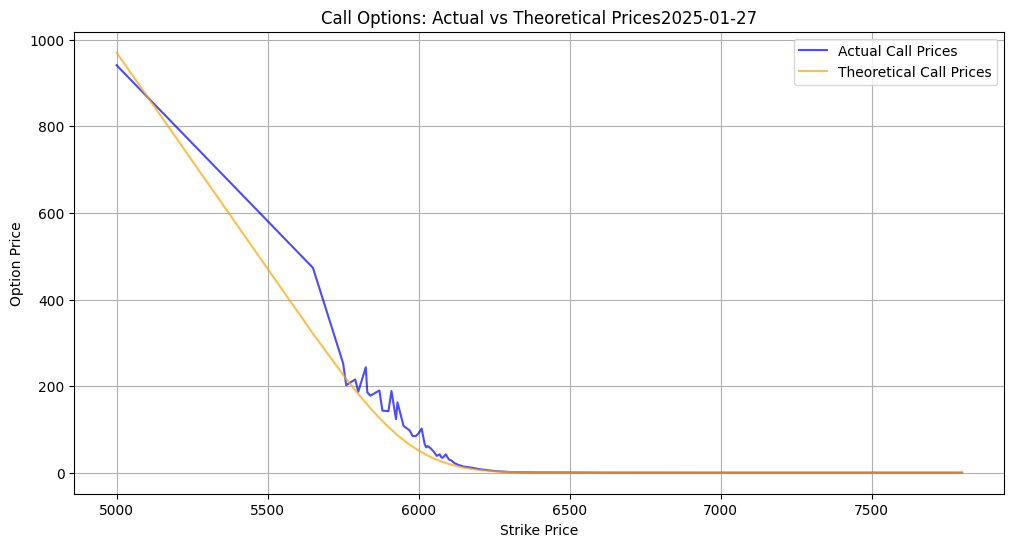

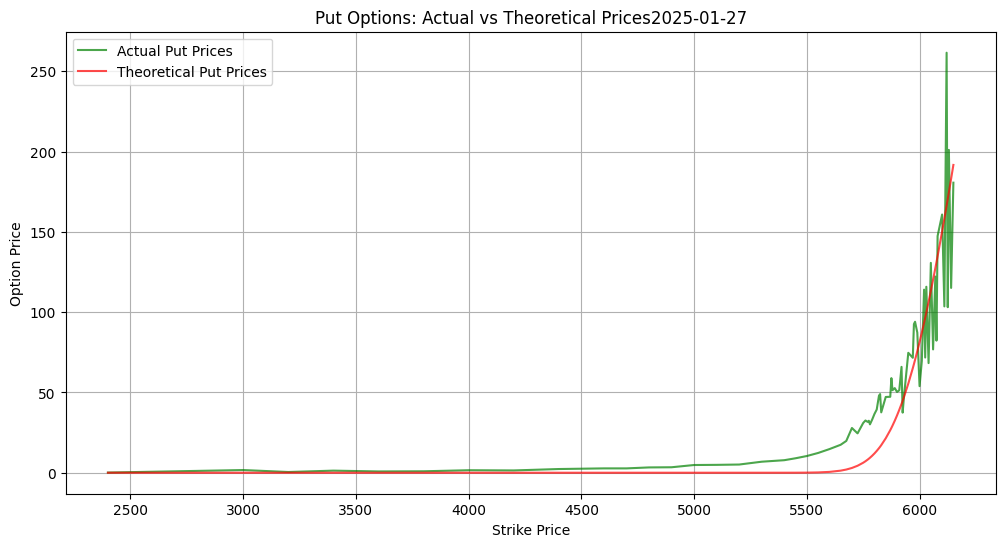

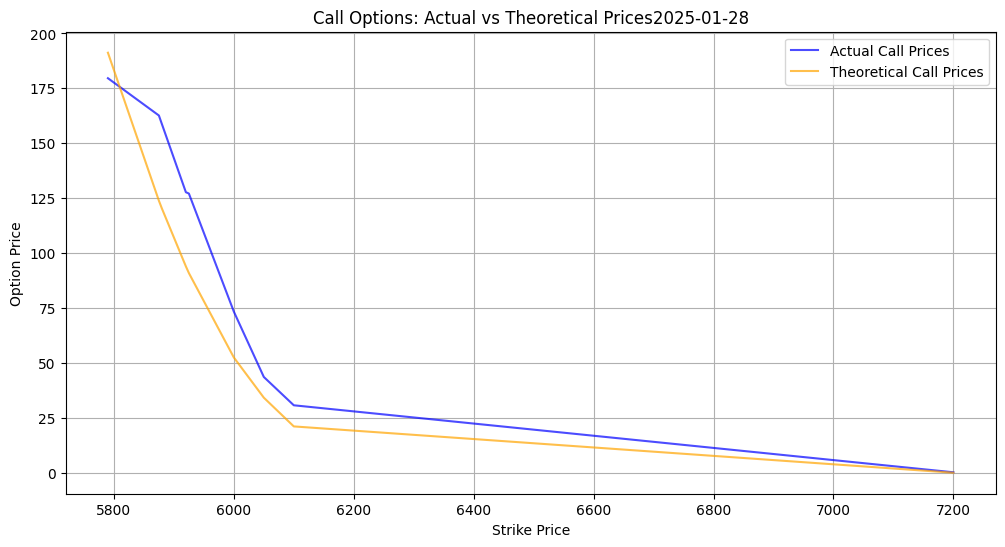

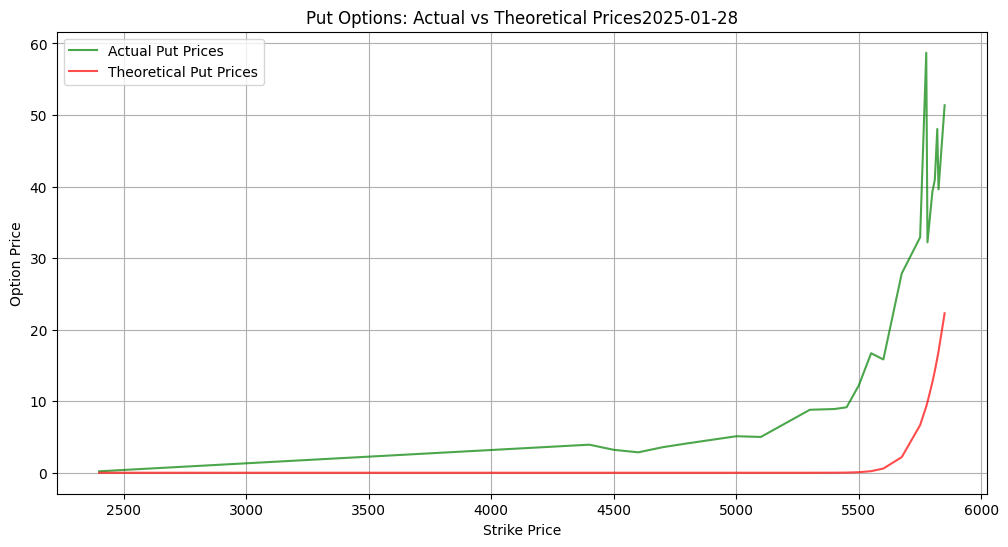

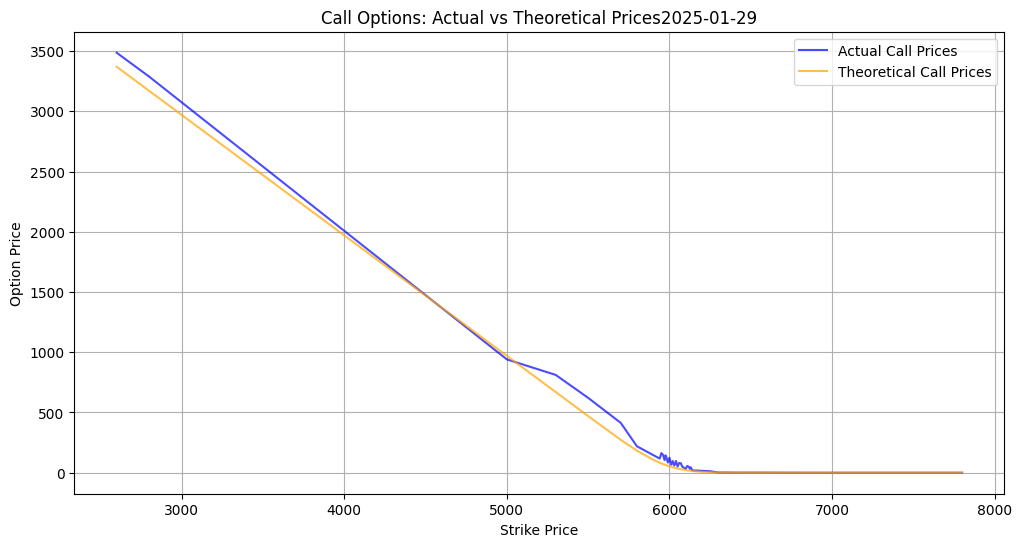

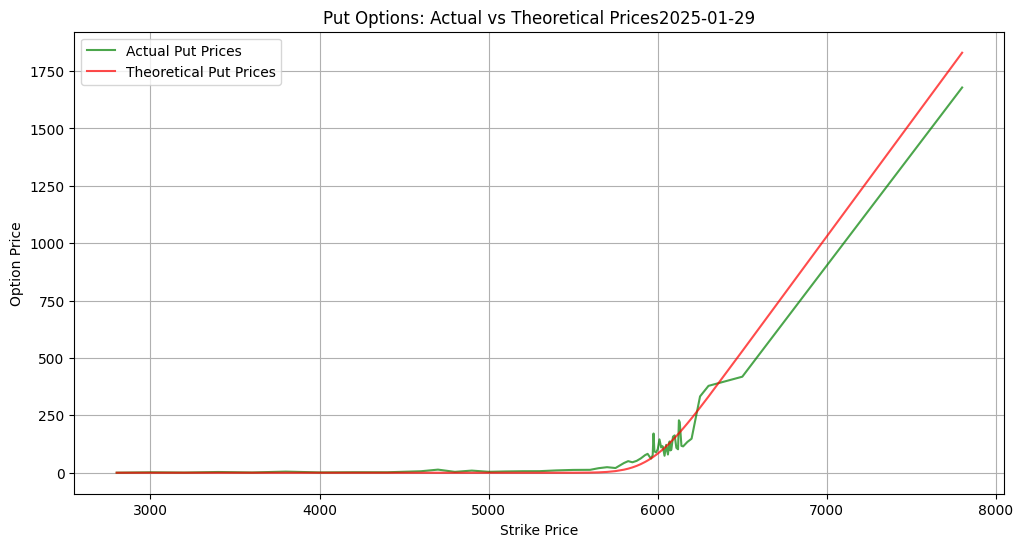

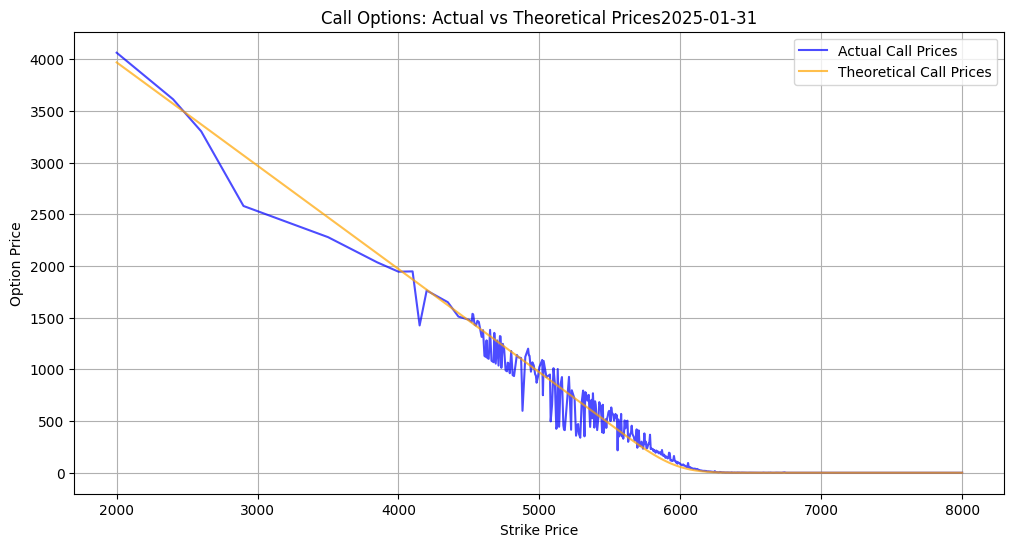

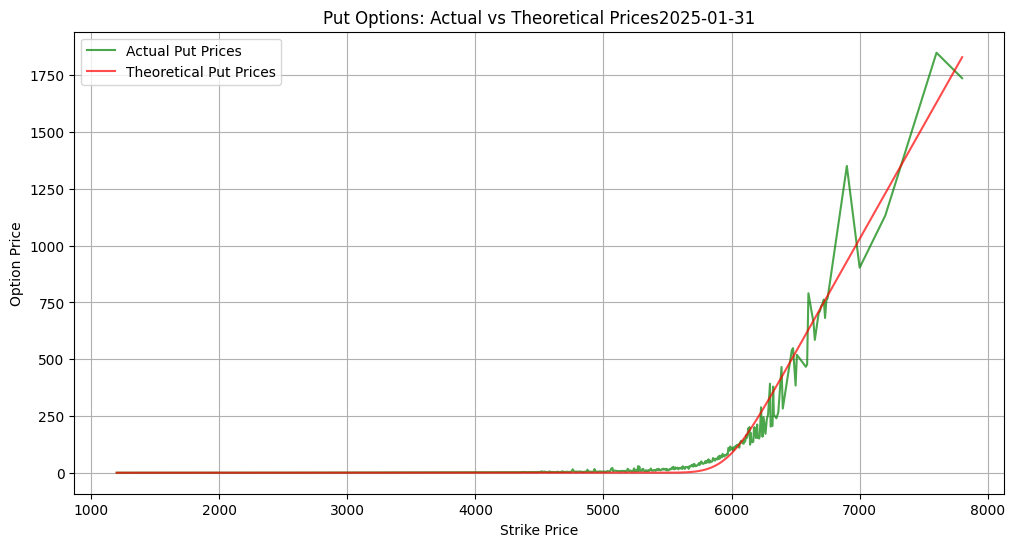

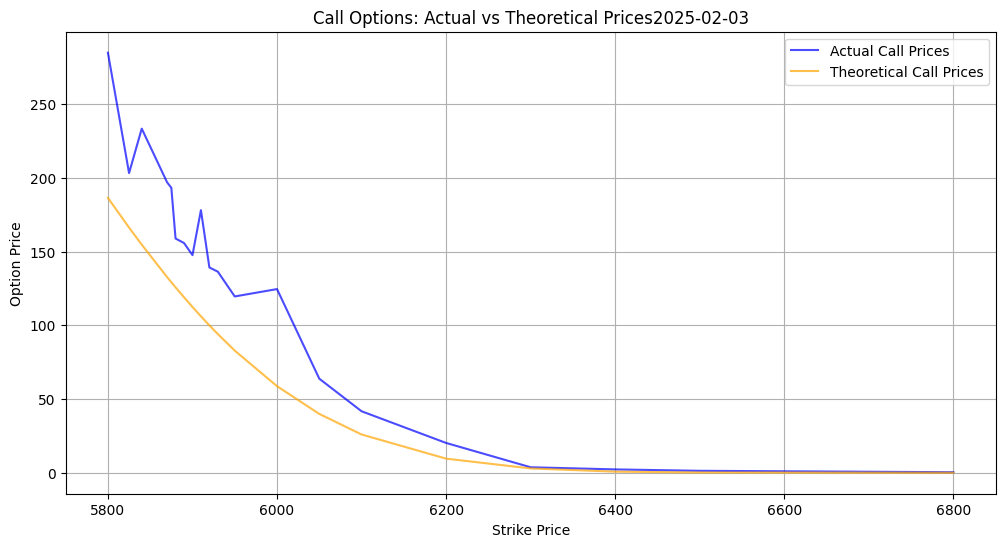

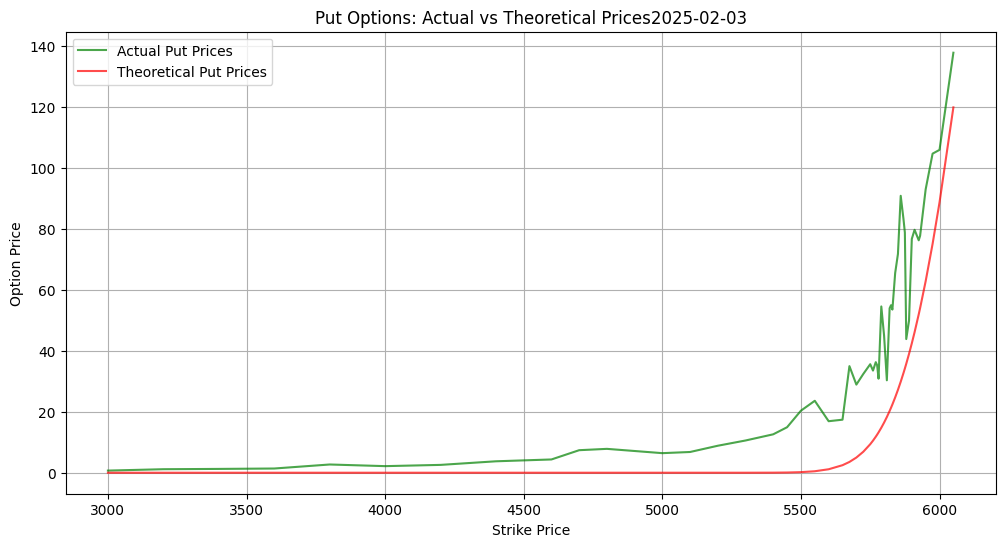

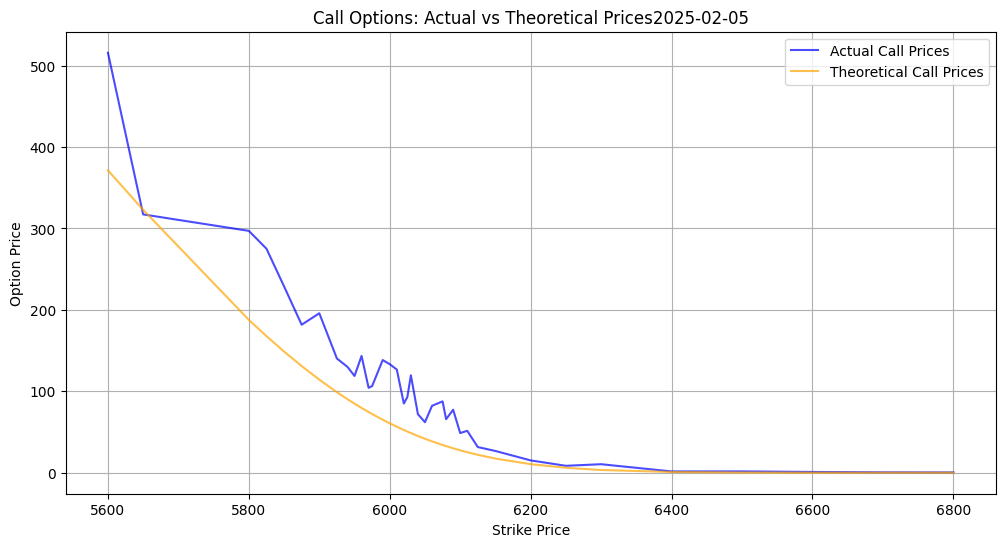

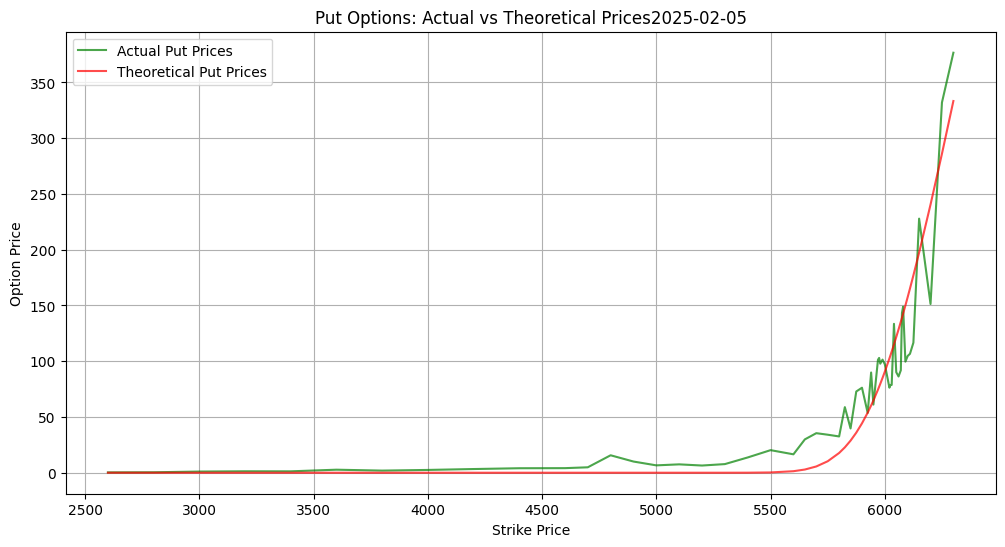

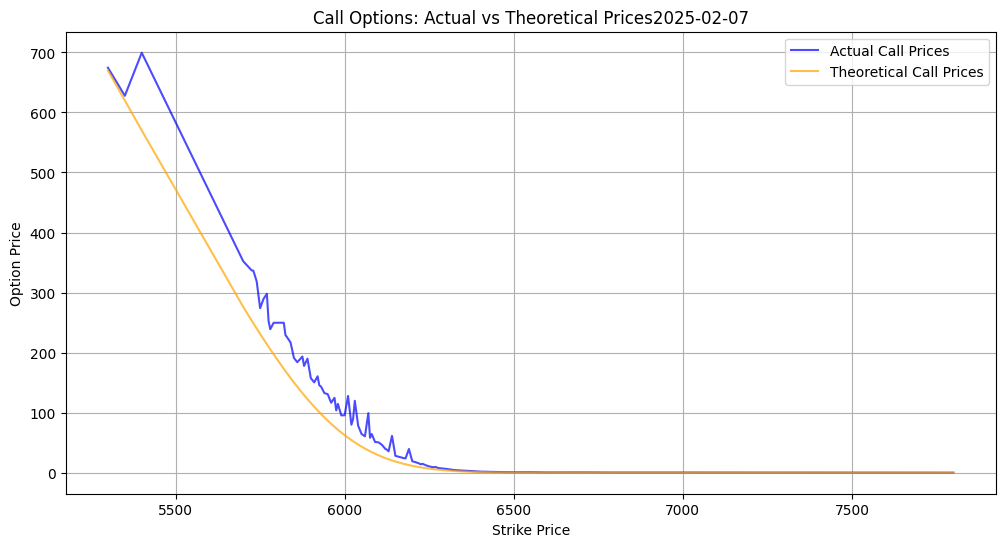

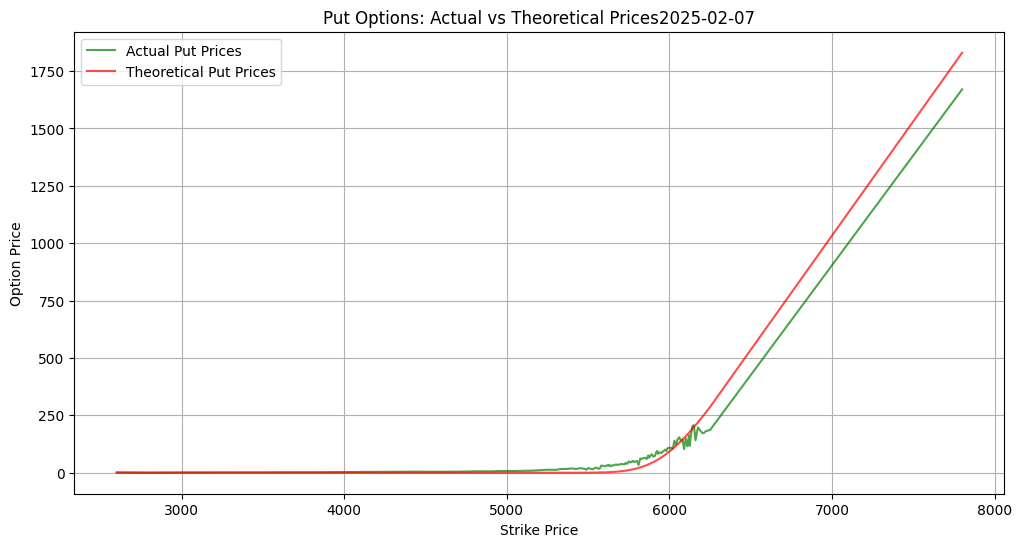

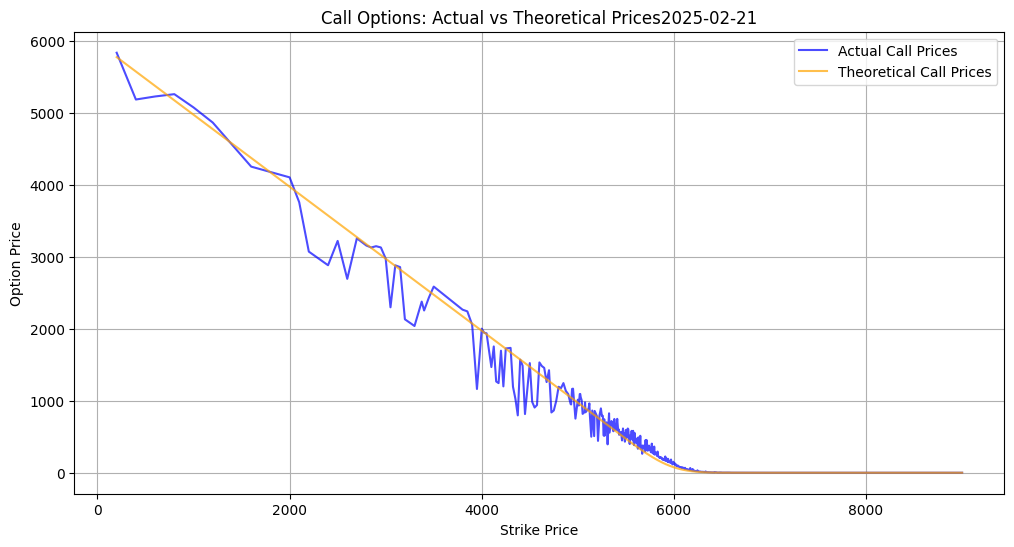

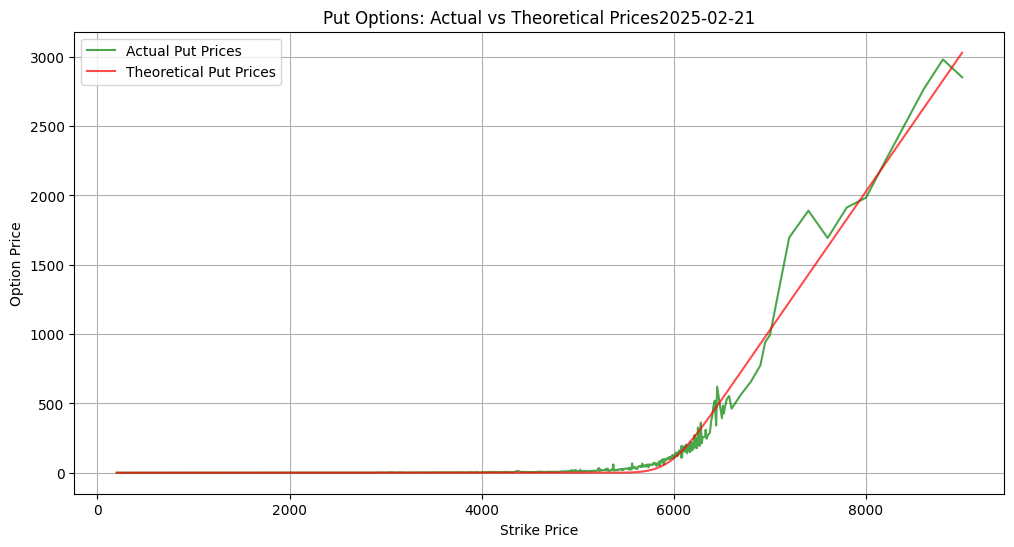

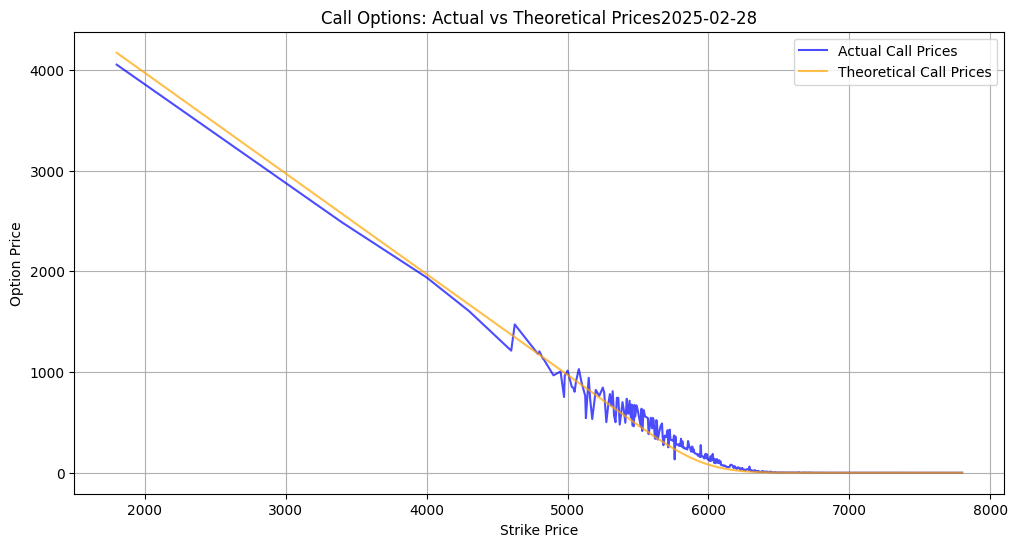

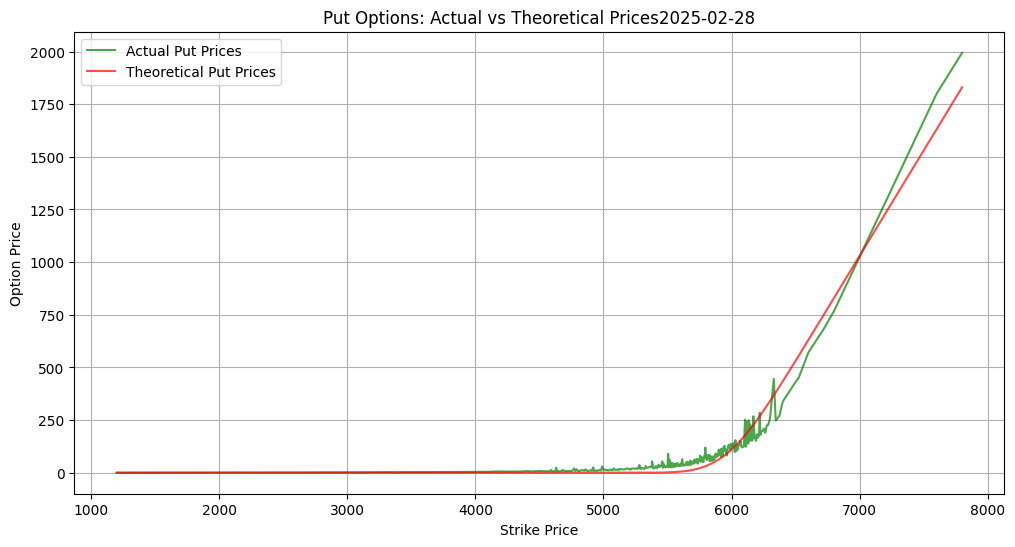

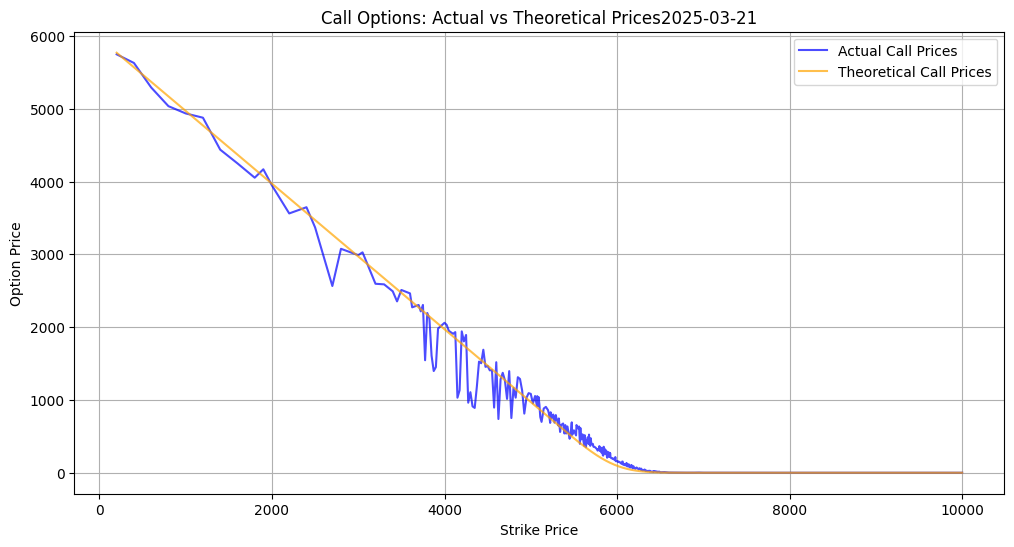

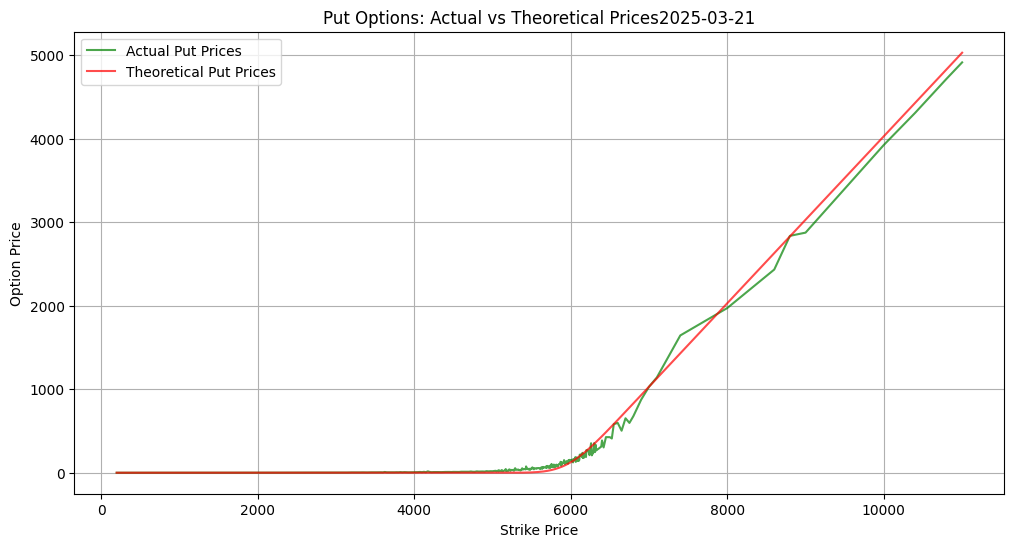

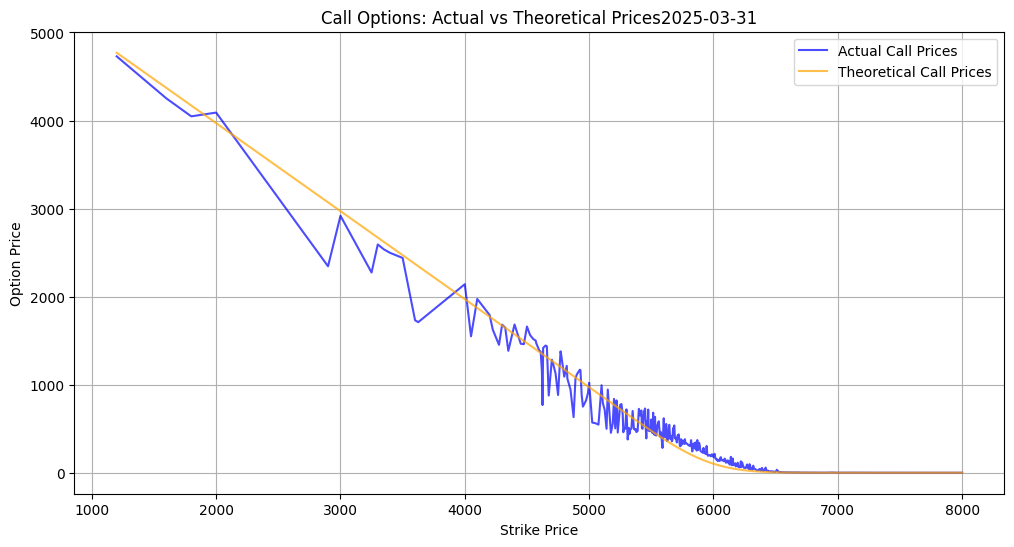

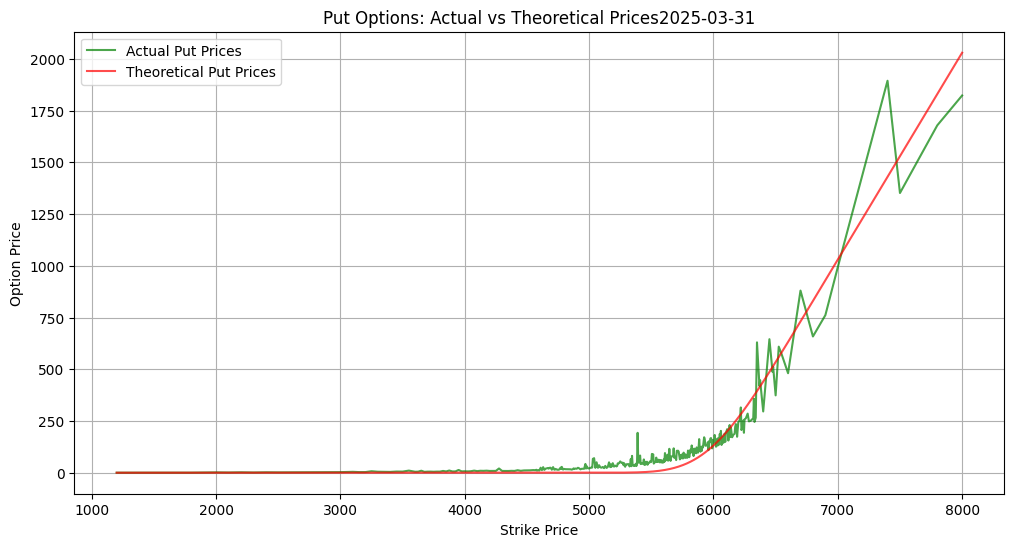

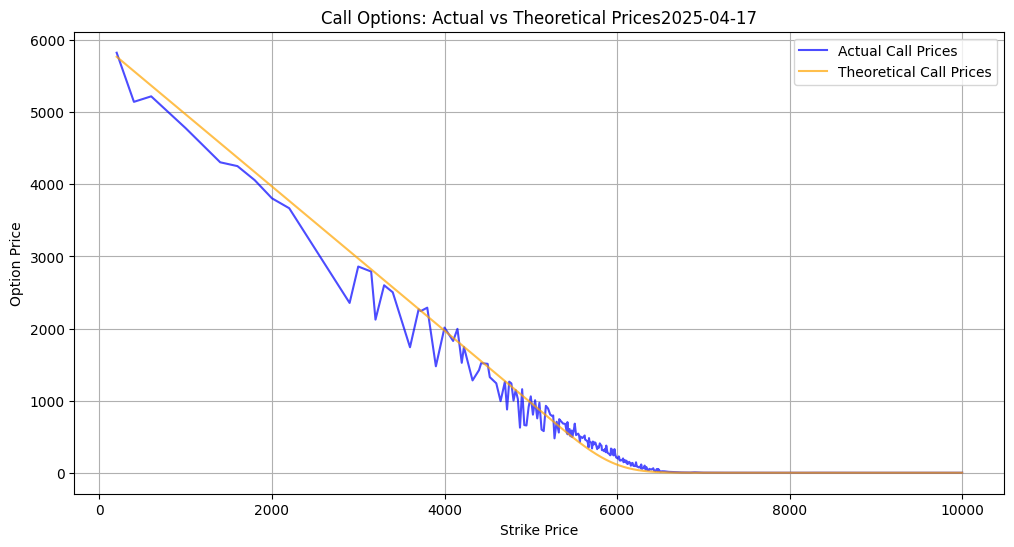

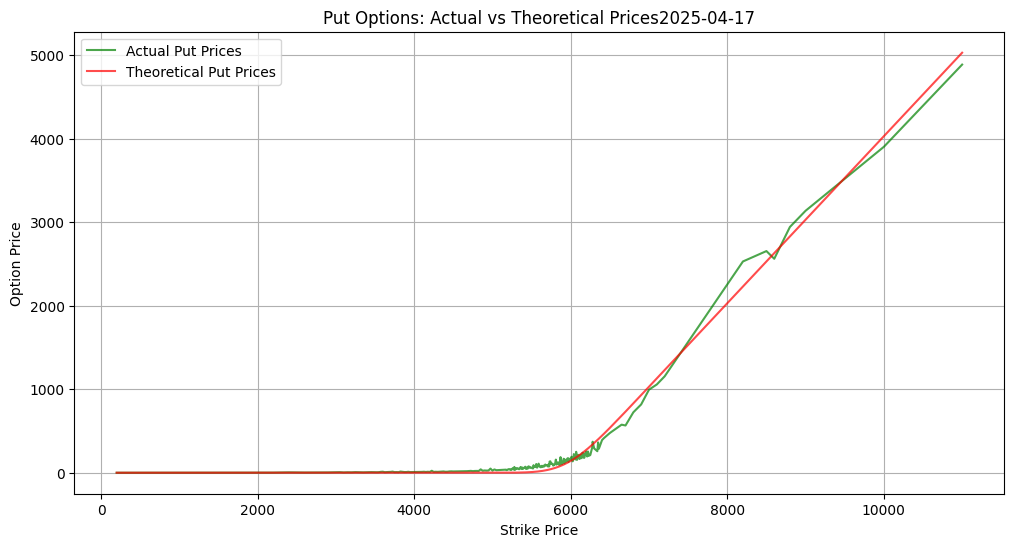

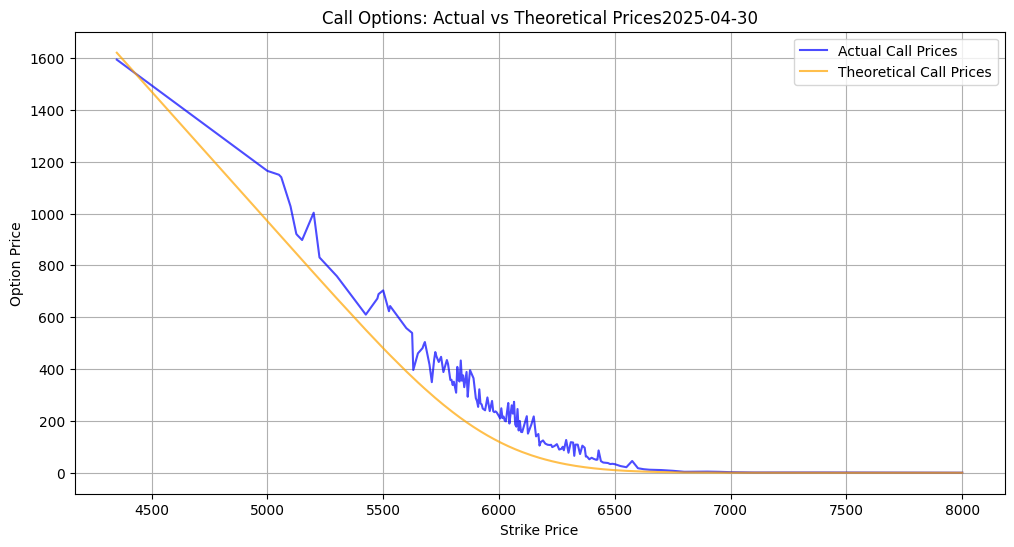

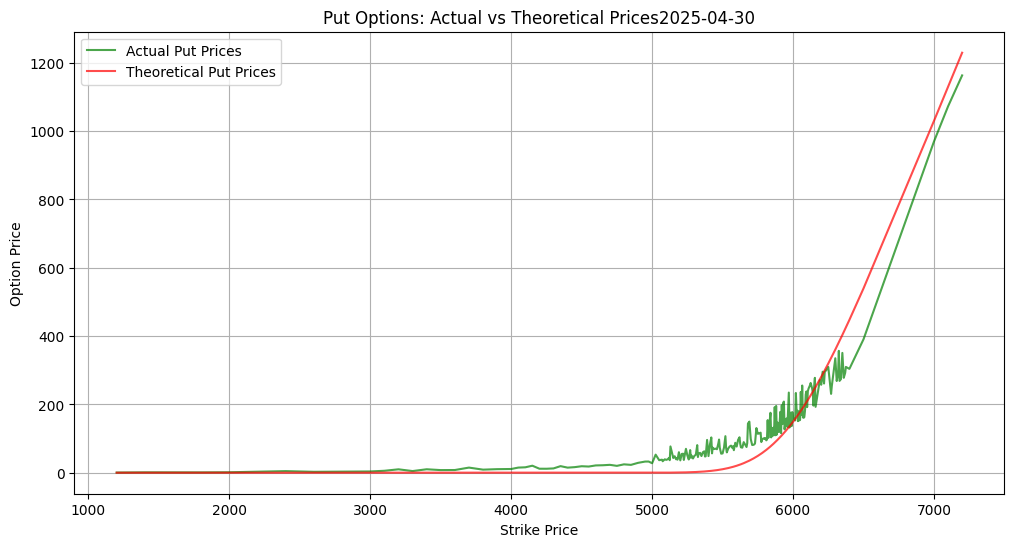

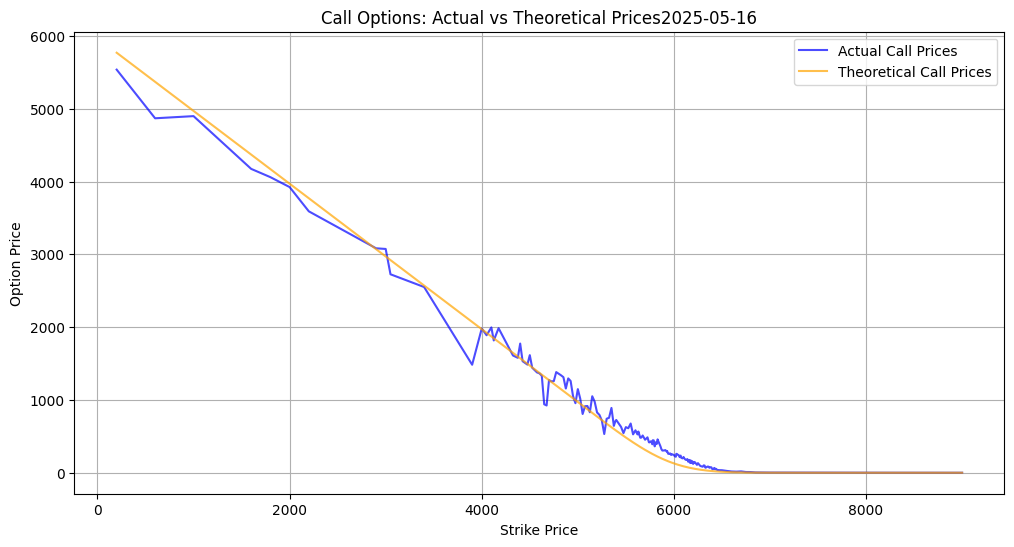

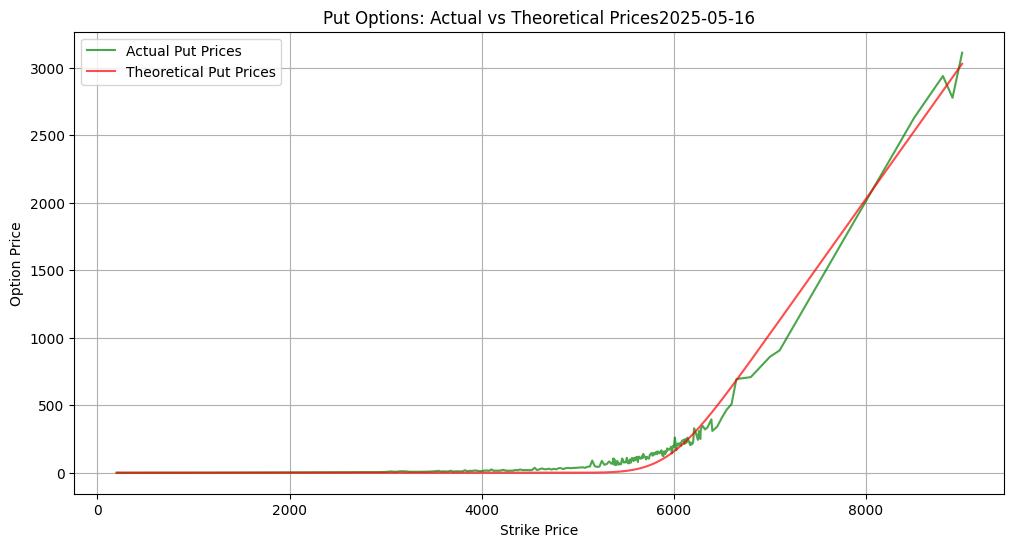

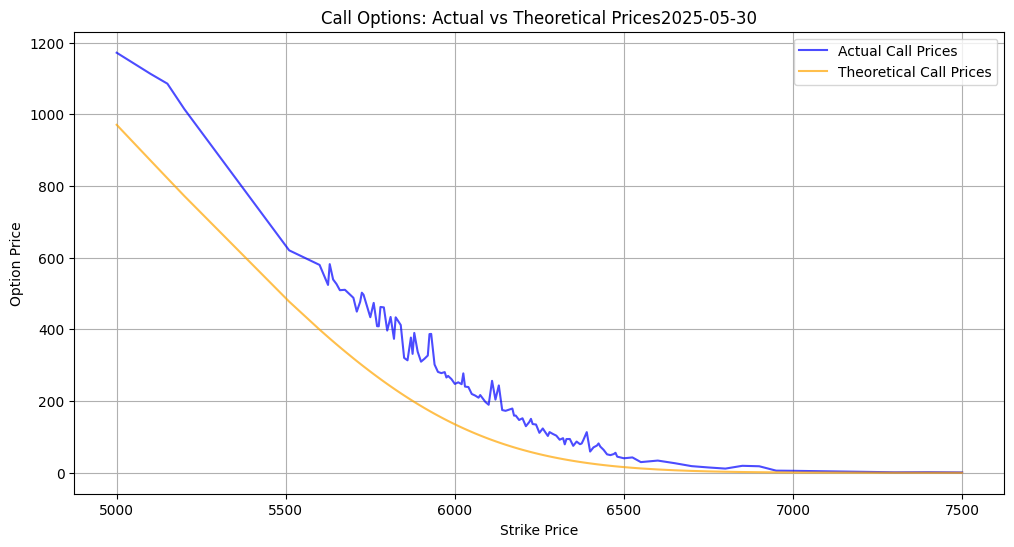

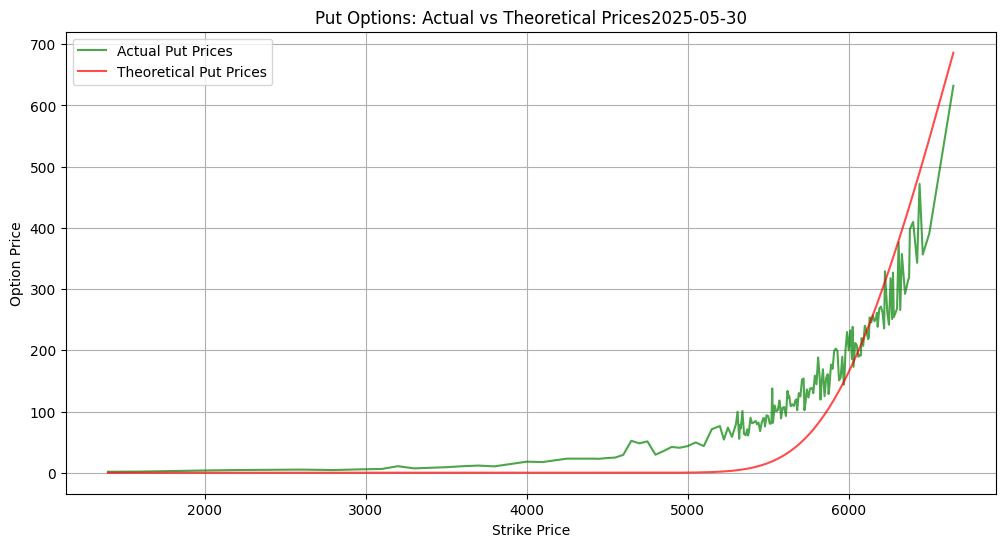

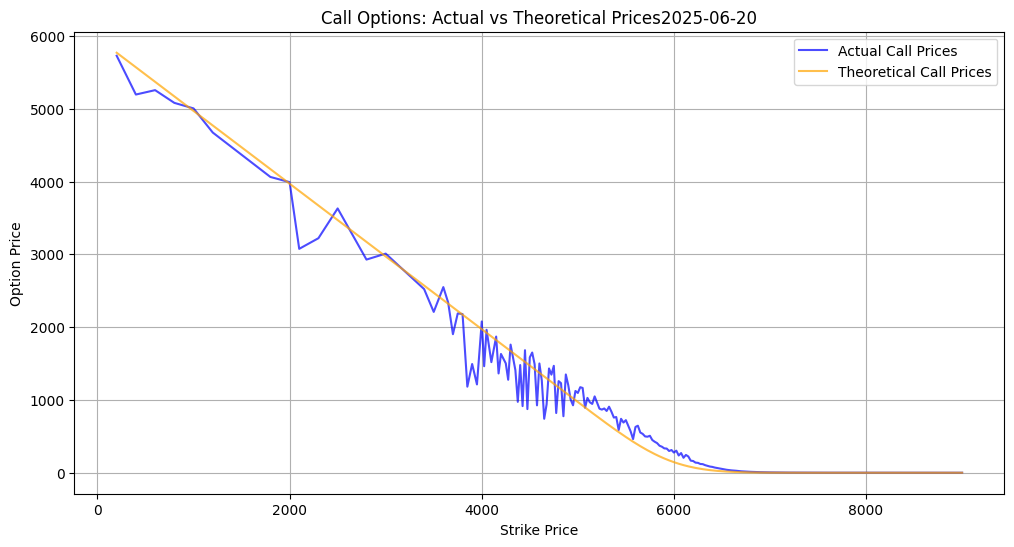

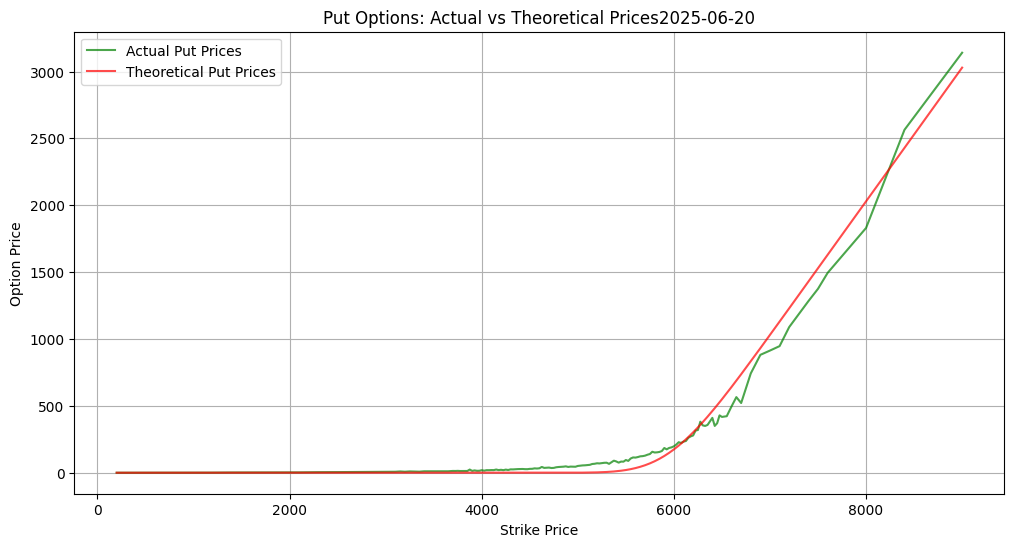

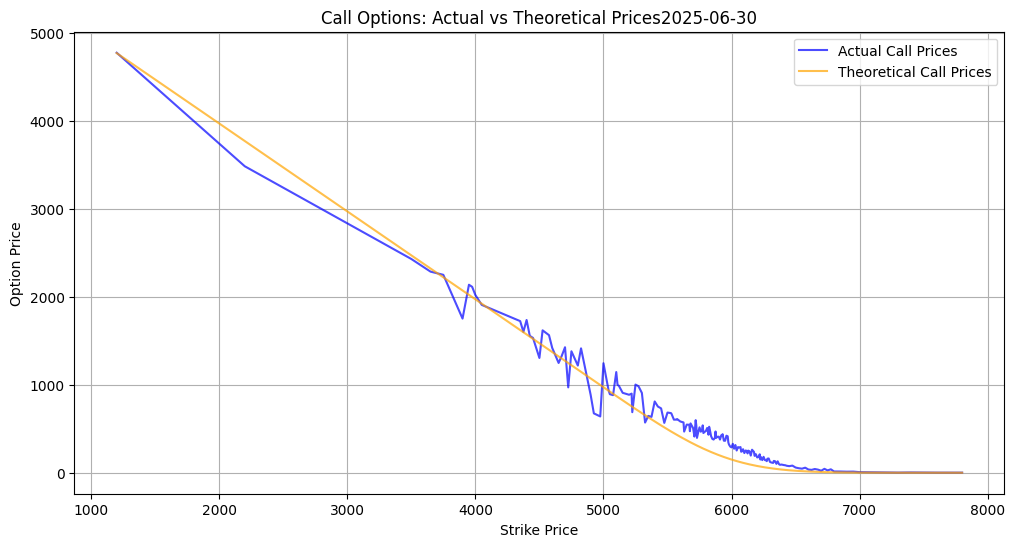

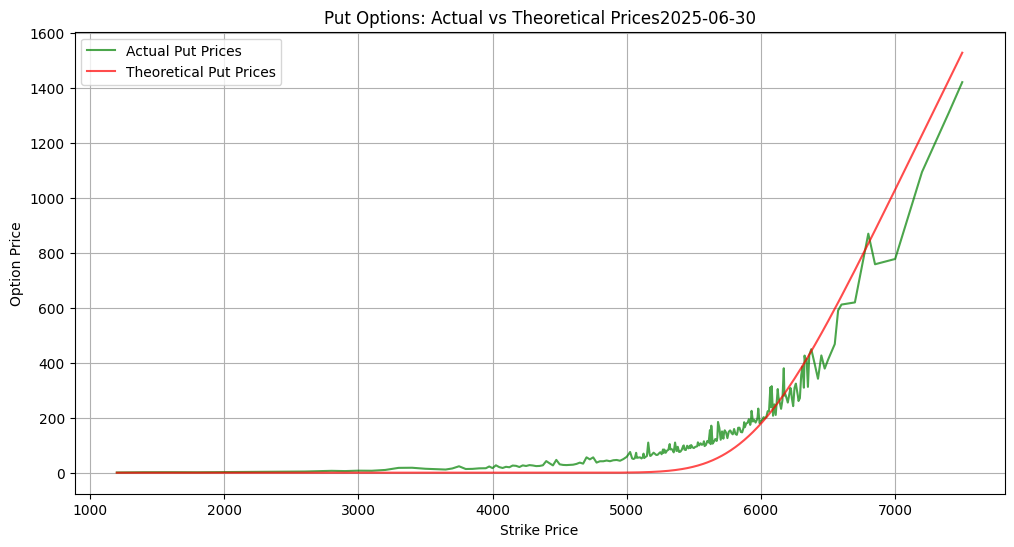

In [213]:
for i in range(len(all_calls)):
  dates = datetime.strptime(expiration_dates[i], '%Y-%m-%d')
  dates2 = datetime.strptime('2025-06-30', '%Y-%m-%d')
  if(dates<=dates2):
# Plot Calls
    plt.figure(figsize=(12, 6))
    plt.plot(all_calls[i]['strike'], all_calls[i]['lastPrice'], label="Actual Call Prices", alpha=0.7, color="blue")
    plt.plot(all_calls[i]['strike'], all_calls[i]['TheoreticalPrice'], label="Theoretical Call Prices", alpha=0.7, color="orange")
    plt.title("Call Options: Actual vs Theoretical Prices"+(expiration_dates[i]))
    plt.xlabel("Strike Price")
    plt.ylabel("Option Price")
    plt.legend()
    plt.grid()
    plt.show()

# Plot Puts
    plt.figure(figsize=(12, 6))
    plt.plot(all_puts[i]['strike'], all_puts[i]['lastPrice'], label="Actual Put Prices", alpha=0.7, color="green")
    plt.plot(all_puts[i]['strike'], all_puts[i]['TheoreticalPrice'], label="Theoretical Put Prices", alpha=0.7, color="red")
    plt.title("Put Options: Actual vs Theoretical Prices"+(expiration_dates[i]))
    plt.xlabel("Strike Price")
    plt.ylabel("Option Price")
    plt.legend()
    plt.grid()
    plt.show()
